In [1]:
# Import libraries.
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
from datetime import datetime
import seaborn as sns
import matplotlib.dates as mdates
import matplotlib.ticker as mticker
import statsmodels.api as sm 
import statsmodels.stats.api as sms
from statsmodels.formula.api import ols
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.stats.diagnostic import het_breuschpagan
import sklearn
from sklearn import metrics 
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import scipy.stats
from scipy.stats import shapiro

# need to find out how to use XGBoost

import nltk
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('words')
nltk.download('omw-1.4')
from nltk.corpus import stopwords
from nltk.corpus import words
from nltk.tokenize import word_tokenize
from nltk.probability import FreqDist

[nltk_data] Downloading package punkt to C:\Users\gamze bozkurt
[nltk_data]     omar\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to C:\Users\gamze bozkurt
[nltk_data]     omar\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package words to C:\Users\gamze bozkurt
[nltk_data]     omar\AppData\Roaming\nltk_data...
[nltk_data]   Package words is already up-to-date!
[nltk_data] Downloading package omw-1.4 to C:\Users\gamze bozkurt
[nltk_data]     omar\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


In [157]:
url = 'https://github.com/gamzebb/group-project/raw/refs/heads/main/merged_sentiment_copy.csv'
df_uk_full = pd.read_csv(url)  

df_uk_full

,Date,ftse_250_price,ftse_250_total_return,base_rate,CPI,ftse_350_Price,"ftse_350_Total Return (Gross, Unhedged)",price_02_Price,"price_02_Total Return (Gross, Unhedged)",confidence_score,price_05_Price,"price_05_Total Return (Gross, Unhedged)",price_10_Price,"price_10_Total Return (Gross, Unhedged)",unemployment_rate,wage_growth_rate,gdp_GDP,polarity_score_finbert
0,01-12-89,2661.760010,803.789978,14.713333,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.5,NaN
1,01-01-90,2591.129883,783.250000,14.630000,5.7,1165.829956,725.320007,NaN,NaN,-19.0,NaN,NaN,NaN,NaN,6.9,NaN,0.5,NaN
2,01-02-90,2463.879883,746.010010,14.546667,5.9,1121.469971,700.580017,NaN,NaN,-24.0,NaN,NaN,NaN,NaN,6.9,NaN,0.5,NaN
3,01-03-90,2437.370117,741.700012,14.463333,6.0,1115.699951,701.400024,NaN,NaN,-35.0,NaN,NaN,NaN,NaN,6.9,NaN,0.7,NaN
4,01-04-90,2285.780029,701.510010,14.380000,6.4,1044.619995,660.010010,NaN,NaN,-31.0,NaN,NaN,NaN,NaN,6.9,NaN,0.7,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
424,01-12-24,20622.605250,18346.656780,4.666667,2.5,4510.612374,9911.349295,97.599004,202.318,-17.0,76.436604,258.074,70.333738,1158.944,4.4,6.0,0.1,NaN
425,01-01-25,20950.482850,18672.852080,4.583333,3.0,4760.296255,10468.532720,97.964750,203.450,-22.0,77.157249,260.303,70.983754,1169.039,4.4,5.6,0.1,NaN
426,01-02-25,20326.383590,18140.063380,4.500000,2.8,4808.022992,10614.288820,97.931114,204.230,-20.0,77.946072,262.794,71.900830,1181.575,4.4,5.6,0.1,NaN
427,01-03-25,19475.479520,17424.441290,4.500000,2.6,4675.031137,10374.199300,98.206564,204.810,-19.0,76.341361,258.271,69.708409,1153.159,4.4,5.6,0.1,NaN


In [161]:
df_uk_full.describe()

,ftse_250_price,ftse_250_total_return,base_rate,CPI,ftse_350_Price,"ftse_350_Total Return (Gross, Unhedged)",price_02_Price,"price_02_Total Return (Gross, Unhedged)",confidence_score,price_05_Price,"price_05_Total Return (Gross, Unhedged)",price_10_Price,"price_10_Total Return (Gross, Unhedged)",unemployment_rate,wage_growth_rate,gdp_GDP,polarity_score_finbert
count,429.000000,429.000000,429.000000,428.000000,428.000000,428.000000,327.000000,327.000000,428.000000,327.000000,327.000000,345.000000,345.000000,428.000000,293.000000,429.000000,294.000000
mean,10618.089403,7088.524507,3.895254,2.741589,2898.553707,4074.876157,102.199686,165.608471,-12.196262,116.558976,233.210150,119.766901,1072.605623,6.202804,3.380546,0.498368,0.071241
std,6486.845572,5765.988797,3.433704,2.147064,963.999754,2551.074231,2.019057,28.512795,12.157390,16.419084,91.571367,20.393053,495.807034,1.857170,1.960185,2.497648,0.162852
min,1974.040039,618.229981,0.175000,-0.100000,968.719971,626.700012,96.086395,100.000000,-49.000000,74.537811,100.000000,69.708409,343.756000,3.600000,-2.900000,-20.300000,-0.485326
25%,4811.399902,2127.800049,0.426966,1.500000,2181.337488,2134.199993,101.393485,141.963000,-21.000000,108.945661,149.728500,108.732895,636.799000,4.800000,2.000000,0.300000,-0.000799
50%,9306.890000,5232.980000,4.500000,2.200000,2996.230000,3465.360000,102.760895,181.923000,-10.000000,117.472840,244.103000,119.794840,943.254000,5.500000,3.200000,0.500000,0.062303
75%,17168.343780,12172.659480,5.730000,3.000000,3666.856365,5929.765691,103.605045,186.355000,-3.000000,126.876200,299.265500,133.330400,1412.945000,7.800000,4.700000,0.800000,0.176186
max,24102.191970,19395.493530,14.713333,11.100000,4808.022992,10614.288820,105.672380,206.139000,10.000000,152.680969,423.925000,168.403976,2192.415000,10.700000,8.900000,16.800000,0.514315


In [163]:
df_uk_full.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 429 entries, 0 to 428
Data columns (total 18 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   Date                                     429 non-null    object 
 1   ftse_250_price                           429 non-null    float64
 2   ftse_250_total_return                    429 non-null    float64
 3   base_rate                                429 non-null    float64
 4   CPI                                      428 non-null    float64
 5   ftse_350_Price                           428 non-null    float64
 6   ftse_350_Total Return (Gross, Unhedged)  428 non-null    float64
 7   price_02_Price                           327 non-null    float64
 8   price_02_Total Return (Gross, Unhedged)  327 non-null    float64
 9   confidence_score                         428 non-null    float64
 10  price_05_Price                           327 non-n

In [165]:
# Convert date to datetime
df_uk_full['Date'] = pd.to_datetime(df_uk_full['Date'], errors='coerce', dayfirst=True)

#Check if the data types are right 
df_uk_full.dtypes

C:\Users\gamze bozkurt omar\AppData\Local\Temp\ipykernel_9912\3670151657.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df_uk_full['Date'] = pd.to_datetime(df_uk_full['Date'], errors='coerce', dayfirst=True)


Date                                       datetime64[ns]
ftse_250_price                                    float64
ftse_250_total_return                             float64
base_rate                                         float64
CPI                                               float64
ftse_350_Price                                    float64
ftse_350_Total Return (Gross, Unhedged)           float64
price_02_Price                                    float64
price_02_Total Return (Gross, Unhedged)           float64
confidence_score                                  float64
price_05_Price                                    float64
price_05_Total Return (Gross, Unhedged)           float64
price_10_Price                                    float64
price_10_Total Return (Gross, Unhedged)           float64
unemployment_rate                                 float64
wage_growth_rate                                  float64
gdp_GDP                                           float64
polarity_score

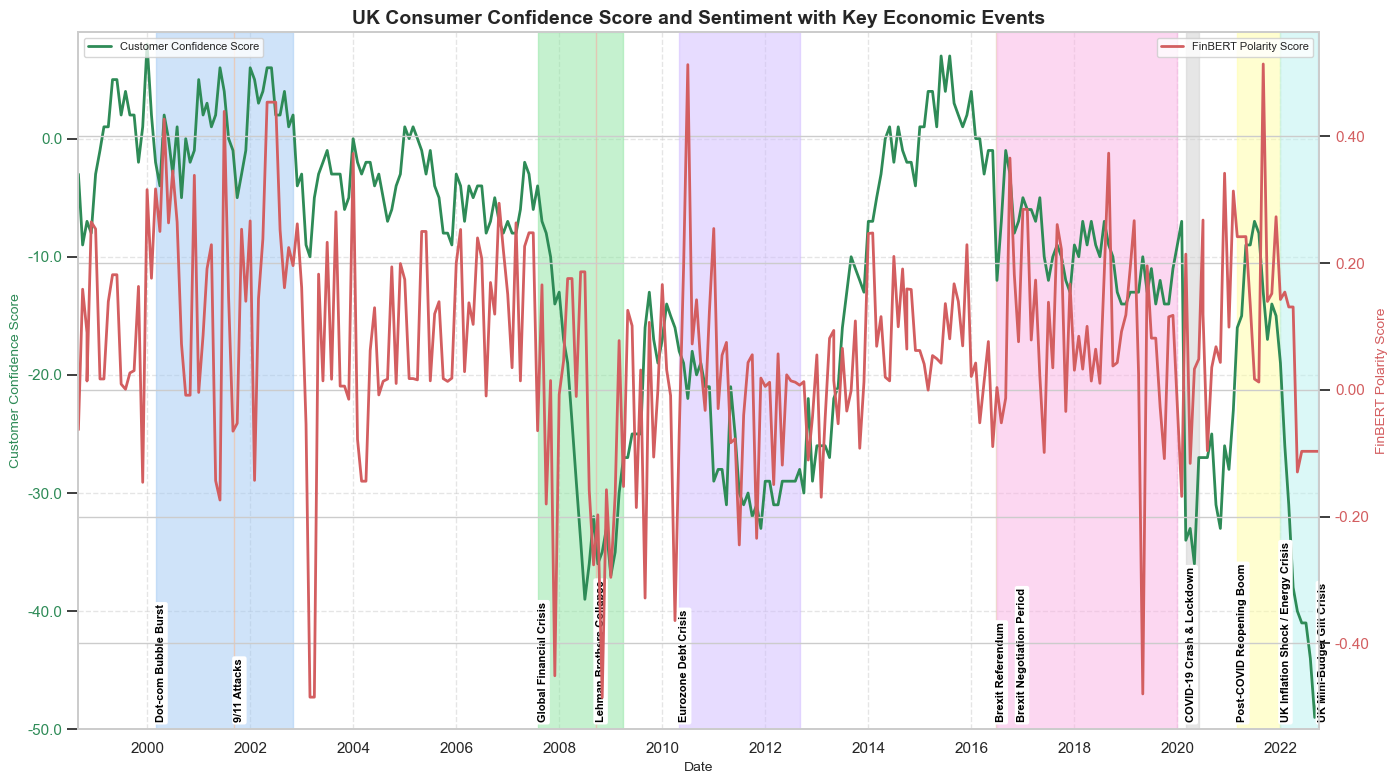

In [167]:
# Filter data from 1 Sep 1998 onwards
start_date = pd.to_datetime('1998-09-01')
df_plot = df_uk_full[df_uk_full['Date'] >= start_date].copy()
df_plot = df_plot.dropna(subset=['confidence_score', 'polarity_score_finbert'])

# Define key economic events
events = {
    'Early 1990s Recession (UK)': {'Start': '1990-07-01', 'End': '1992-09-30'},
    'Black Wednesday (ERM Crisis)': {'Start': '1992-09-16', 'End': '1992-09-16'},
    'BoE Operational Independence': {'Start': '1997-05-06', 'End': '1997-05-06'},
    'Dot-com Bubble Burst': {'Start': '2000-03-01', 'End': '2002-10-31'},
    '9/11 Attacks': {'Start': '2001-09-11', 'End': '2001-09-11'},
    'Global Financial Crisis (GFC)': {'Start': '2007-08-01', 'End': '2009-03-31'},
    'Lehman Brothers Collapse': {'Start': '2008-09-15', 'End': '2008-09-15'},
    'Eurozone Debt Crisis': {'Start': '2010-05-01', 'End': '2012-08-31'},
    'Brexit Referendum': {'Start': '2016-06-23', 'End': '2016-06-23'},
    'Brexit Negotiation Period': {'Start': '2016-07-01', 'End': '2019-12-31'},
    'COVID-19 Crash & Lockdown': {'Start': '2020-03-01', 'End': '2020-05-31'},
    'Post-COVID Reopening Boom': {'Start': '2021-03-01', 'End': '2021-12-31'},
    'UK Inflation Shock / Energy Crisis': {'Start': '2022-01-01', 'End': '2022-12-31'},
    'UK Mini-Budget Gilt Crisis': {'Start': '2022-09-23', 'End': '2022-10-14'}
}

# Plot style
sns.set_style('whitegrid')
fig, ax1 = plt.subplots(figsize=(14, 8))

# Confidence Score Plot
color_cs = '#2E8B57'
ax1.set_xlabel('Date', fontsize=10)
ax1.set_ylabel('Customer Confidence Score', color=color_cs, fontsize=10)
ax1.plot(df_plot['Date'], df_plot['confidence_score'], color=color_cs, label='Customer Confidence Score', linewidth=2)
ax1.tick_params(axis='y', labelcolor=color_cs, size=8)

# Sentiment Score Plot
ax2 = ax1.twinx()
color_sentiment = '#d35e60'
ax2.set_ylabel('FinBERT Polarity Score', color=color_sentiment, fontsize=10)
ax2.plot(df_plot['Date'], df_plot['polarity_score_finbert'], color=color_sentiment, label='FinBERT Polarity Score', linewidth=2)
ax2.tick_params(axis='y', labelcolor=color_sentiment, size=8)

# Event Shading and Labels
event_colors = sns.color_palette('pastel', n_colors=len(events)).as_hex()
label_y_offset = 0.01
label_fontsize = 8
i = 0

label_positions = {}
brexit_referendum_end = pd.to_datetime(events['Brexit Referendum']['End'])
label_positions['Brexit Referendum'] = brexit_referendum_end
label_positions['Brexit Negotiation Period'] = brexit_referendum_end + pd.Timedelta(days=150)

for event_name, dates in events.items():
    start = pd.to_datetime(dates['Start'])
    end = pd.to_datetime(dates['End'])

    if end >= start_date:
        display_start = max(start, start_date)
        ax1.axvspan(display_start, end, color=event_colors[i % len(event_colors)], alpha=0.5)
        label_x_pos = label_positions.get(event_name, display_start)

        ax1.text(label_x_pos, 0.01,
                 event_name.split('(')[0].strip(),
                 rotation=90,
                 fontsize=label_fontsize,
                 color='black',
                 fontweight='bold',
                 ha='left',
                 va='bottom',
                 transform=ax1.get_xaxis_transform(),
                 zorder=5,
                 bbox=dict(
                     facecolor='white',
                     alpha=1,
                     edgecolor='none',
                     boxstyle='round,pad=0.2'
                 ))
        i += 1

# Titles and formatting
plt.title('UK Consumer Confidence Score and Sentiment with Key Economic Events', fontsize=14, fontweight='bold')
fig.tight_layout()
ax1.xaxis.set_major_locator(mdates.YearLocator(2))
ax1.xaxis.set_major_formatter(mdates.DateFormatter('%Y'))
plt.xticks(rotation=45, ha='right', fontsize=8)
ax1.yaxis.set_major_formatter(mticker.StrMethodFormatter('{x:.1f}'))
ax2.yaxis.set_major_formatter(mticker.StrMethodFormatter('{x:.2f}'))

# Legends
ax1.legend(loc='upper left', fontsize=8)
ax2.legend(loc='upper right', fontsize=8)

# Grid and limits
ax1.grid(True, which='major', linestyle='--', alpha=0.5)
ax1.set_xlim(start_date, df_plot['Date'].max())
ax1.set_ylim(df_plot['confidence_score'].min() - 1, df_plot['confidence_score'].max() + 1)


plt.show()


### The chart shows that Customer Confidence Score is highly sensitive to major economic events, with sharp declines during crises such as the 2008 financial crash, Brexit, and the COVID-19 lockdown. While FinBERT Polarity Score also reacts to these events, it remains relatively more stable and tends to show shorter-lived spikes. Notably, the two measures sometimes move in different directions, highlighting that confidence scores reflect public economic outlook, whereas FinBERT sentiment captures the tone of Bank of England communications.

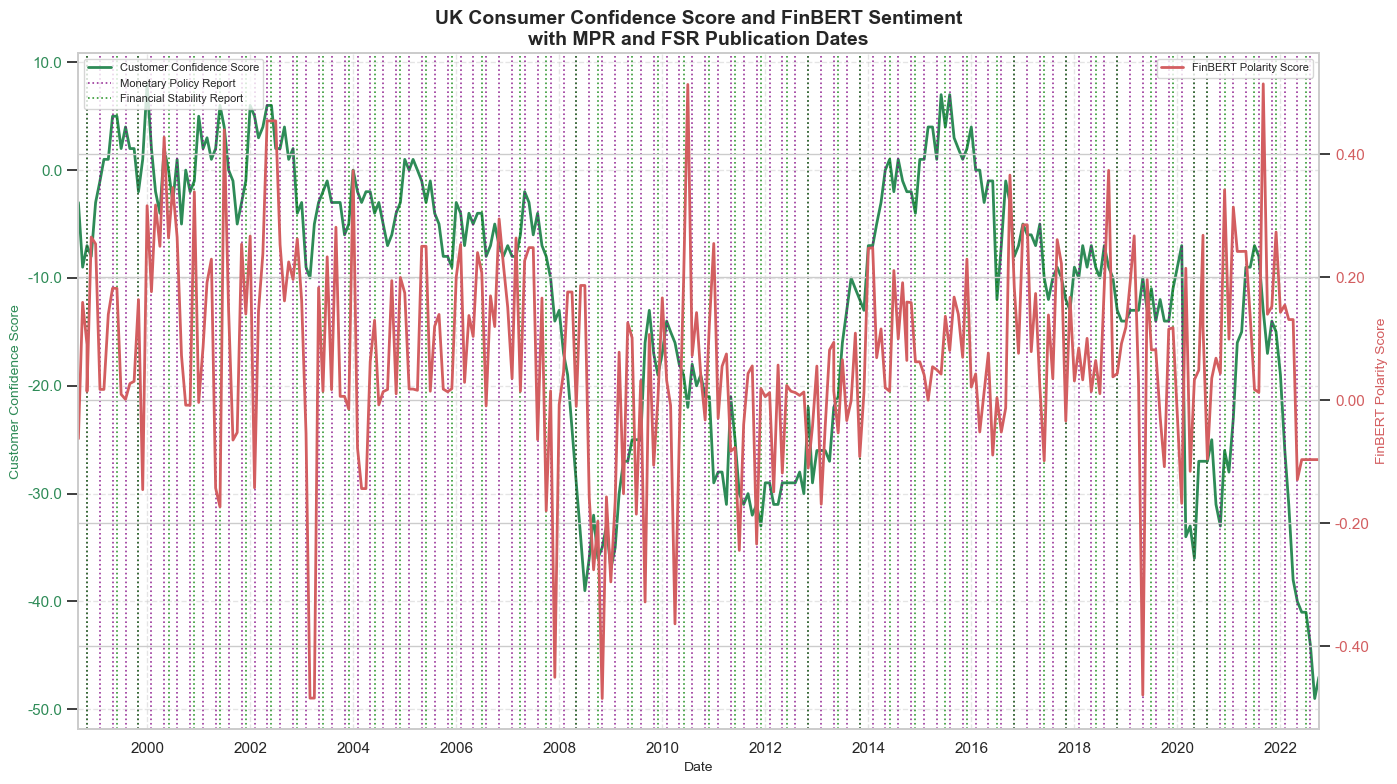

In [170]:
# Filter data from 1 Sep 1998 onwards
start_date = pd.to_datetime('1998-09-01')
df_plot2 = df_uk_full[df_uk_full['Date'] >= start_date].copy()
df_plot2 = df_plot2.dropna(subset=['confidence_score', 'polarity_score_finbert'])

# Load publication dates from repo
mpr_url = 'https://github.com/gamzebb/group-project/raw/refs/heads/main/report_publication_dates/mpr_dates_cleaned.csv'
fsr_url = 'https://github.com/gamzebb/group-project/raw/refs/heads/main/report_publication_dates/fsr_dates_cleaned.csv'

mpr_dates = pd.read_csv(mpr_url, parse_dates=["date"])
fsr_dates = pd.read_csv(fsr_url, parse_dates=["date"])

# Apply style
sns.set_style('whitegrid')

# Plot setup
fig, ax1 = plt.subplots(figsize=(14, 8))

# Confidence Score (Left Axis)
color_conf = '#2E8B57'
ax1.set_xlabel('Date', fontsize=10)
ax1.set_ylabel('Customer Confidence Score', color=color_conf, fontsize=10)
ax1.plot(df_plot2['Date'], df_plot2['confidence_score'], color=color_conf, label='Customer Confidence Score', linewidth=2)
ax1.tick_params(axis='y', labelcolor=color_conf, size=8)

# FinBERT Polarity Score (Right Axis)
ax2 = ax1.twinx()
color_sentiment = '#d35e60'
ax2.set_ylabel('FinBERT Polarity Score', color=color_sentiment, fontsize=10)
ax2.plot(df_plot2['Date'], df_plot2['polarity_score_finbert'], color=color_sentiment, label='FinBERT Polarity Score', linewidth=2)
ax2.tick_params(axis='y', labelcolor=color_sentiment, size=8)

# Add MPR vertical lines (Purple)
for date in mpr_dates['date']:
    ax1.axvline(x=date, color='purple', linestyle=':', linewidth=1.2, alpha=0.8, label='Monetary Policy Report')

# Add FSR vertical lines (Green)
for date in fsr_dates['date']:
    ax1.axvline(x=date, color='green', linestyle=':', linewidth=1.2, alpha=0.8, label='Financial Stability Report')

# Title and layout
plt.title('UK Consumer Confidence Score and FinBERT Sentiment\nwith MPR and FSR Publication Dates', fontsize=14, fontweight='bold')
fig.tight_layout()

# X-axis formatting
ax1.xaxis.set_major_locator(mdates.YearLocator(2))
ax1.xaxis.set_major_formatter(mdates.DateFormatter('%Y'))
plt.xticks(rotation=45, ha='right', fontsize=8)

# Y-axis formatting
ax1.yaxis.set_major_formatter(mticker.StrMethodFormatter('{x:.1f}'))
ax2.yaxis.set_major_formatter(mticker.StrMethodFormatter('{x:.2f}'))

# Deduplicated legends
handles, labels = ax1.get_legend_handles_labels()
unique_labels = dict(zip(labels, handles))
ax1.legend(unique_labels.values(), unique_labels.keys(), loc='upper left', fontsize=8)

handles2, labels2 = ax2.get_legend_handles_labels()
unique_labels2 = dict(zip(labels2, handles2))
ax2.legend(unique_labels2.values(), unique_labels2.keys(), loc='upper right', fontsize=8)

# Grid and limits
ax1.grid(True, which='major', linestyle='--', alpha=0.5)
ax1.set_xlim(start_date, df_plot2['Date'].max())
# Optional: remove y-axis limit so negative confidence values show
# ax1.set_ylim(bottom=-0.5)  # <-- comment or remove this line if needed

plt.show()

In [176]:
# Drop unnecessary columns. Alters the original "df_uk" dataframe to reflected dropped columns
df_uk_focused = df_uk_full.drop(['ftse_250_price',
                            'ftse_350_Price',
                            'ftse_350_Total Return (Gross, Unhedged)',
                            'price_02_Price',
                            'price_05_Price',
                            'price_05_Total Return (Gross, Unhedged)',
                            'price_10_Price',
                            'price_10_Total Return (Gross, Unhedged)'], axis=1)

# View column names.
df_uk_focused.columns

Index(['Date', 'ftse_250_total_return', 'base_rate', 'CPI',
       'price_02_Total Return (Gross, Unhedged)', 'confidence_score',
       'unemployment_rate', 'wage_growth_rate', 'gdp_GDP',
       'polarity_score_finbert'],
      dtype='object')

In [178]:
# Rename the column headers.
df_uk_focused.rename(columns={
    'base_rate': 'BoE_base_rate',
    'CPI': 'CPI_pct_change',
    'gdp_GDP': 'GDP_pct_change',
    'price_02_Total Return (Gross, Unhedged)': '0-2yr_gilts_TReturns',
    'polarity_score_finbert':'finbert_sentiment_score'
}, inplace=True)

# View column names.
df_uk_focused.columns

Index(['Date', 'ftse_250_total_return', 'BoE_base_rate', 'CPI_pct_change',
       '0-2yr_gilts_TReturns', 'confidence_score', 'unemployment_rate',
       'wage_growth_rate', 'GDP_pct_change', 'finbert_sentiment_score'],
      dtype='object')

In [180]:
# Define the new order of the columns
new_column_order = [
    'Date', 'CPI_pct_change', 'finbert_sentiment_score', 'confidence_score',
     'unemployment_rate','wage_growth_rate', 'GDP_pct_change',
    'ftse_250_total_return', 'BoE_base_rate', '0-2yr_gilts_TReturns'
]

# Reindex the DataFrame with the new column order
df_uk_focused = df_uk_focused[new_column_order]

df_uk_focused.head()

,Date,CPI_pct_change,finbert_sentiment_score,confidence_score,unemployment_rate,wage_growth_rate,GDP_pct_change,ftse_250_total_return,BoE_base_rate,0-2yr_gilts_TReturns
0,1989-12-01,NaN,NaN,NaN,NaN,NaN,0.5,803.789978,14.713333,NaN
1,1990-01-01,5.7,NaN,-19.0,6.9,NaN,0.5,783.250000,14.630000,NaN
2,1990-02-01,5.9,NaN,-24.0,6.9,NaN,0.5,746.010010,14.546667,NaN
3,1990-03-01,6.0,NaN,-35.0,6.9,NaN,0.7,741.700012,14.463333,NaN
4,1990-04-01,6.4,NaN,-31.0,6.9,NaN,0.7,701.510010,14.380000,NaN


### Corraletion Analysis

#### Create pairplot for visual correlation analysis

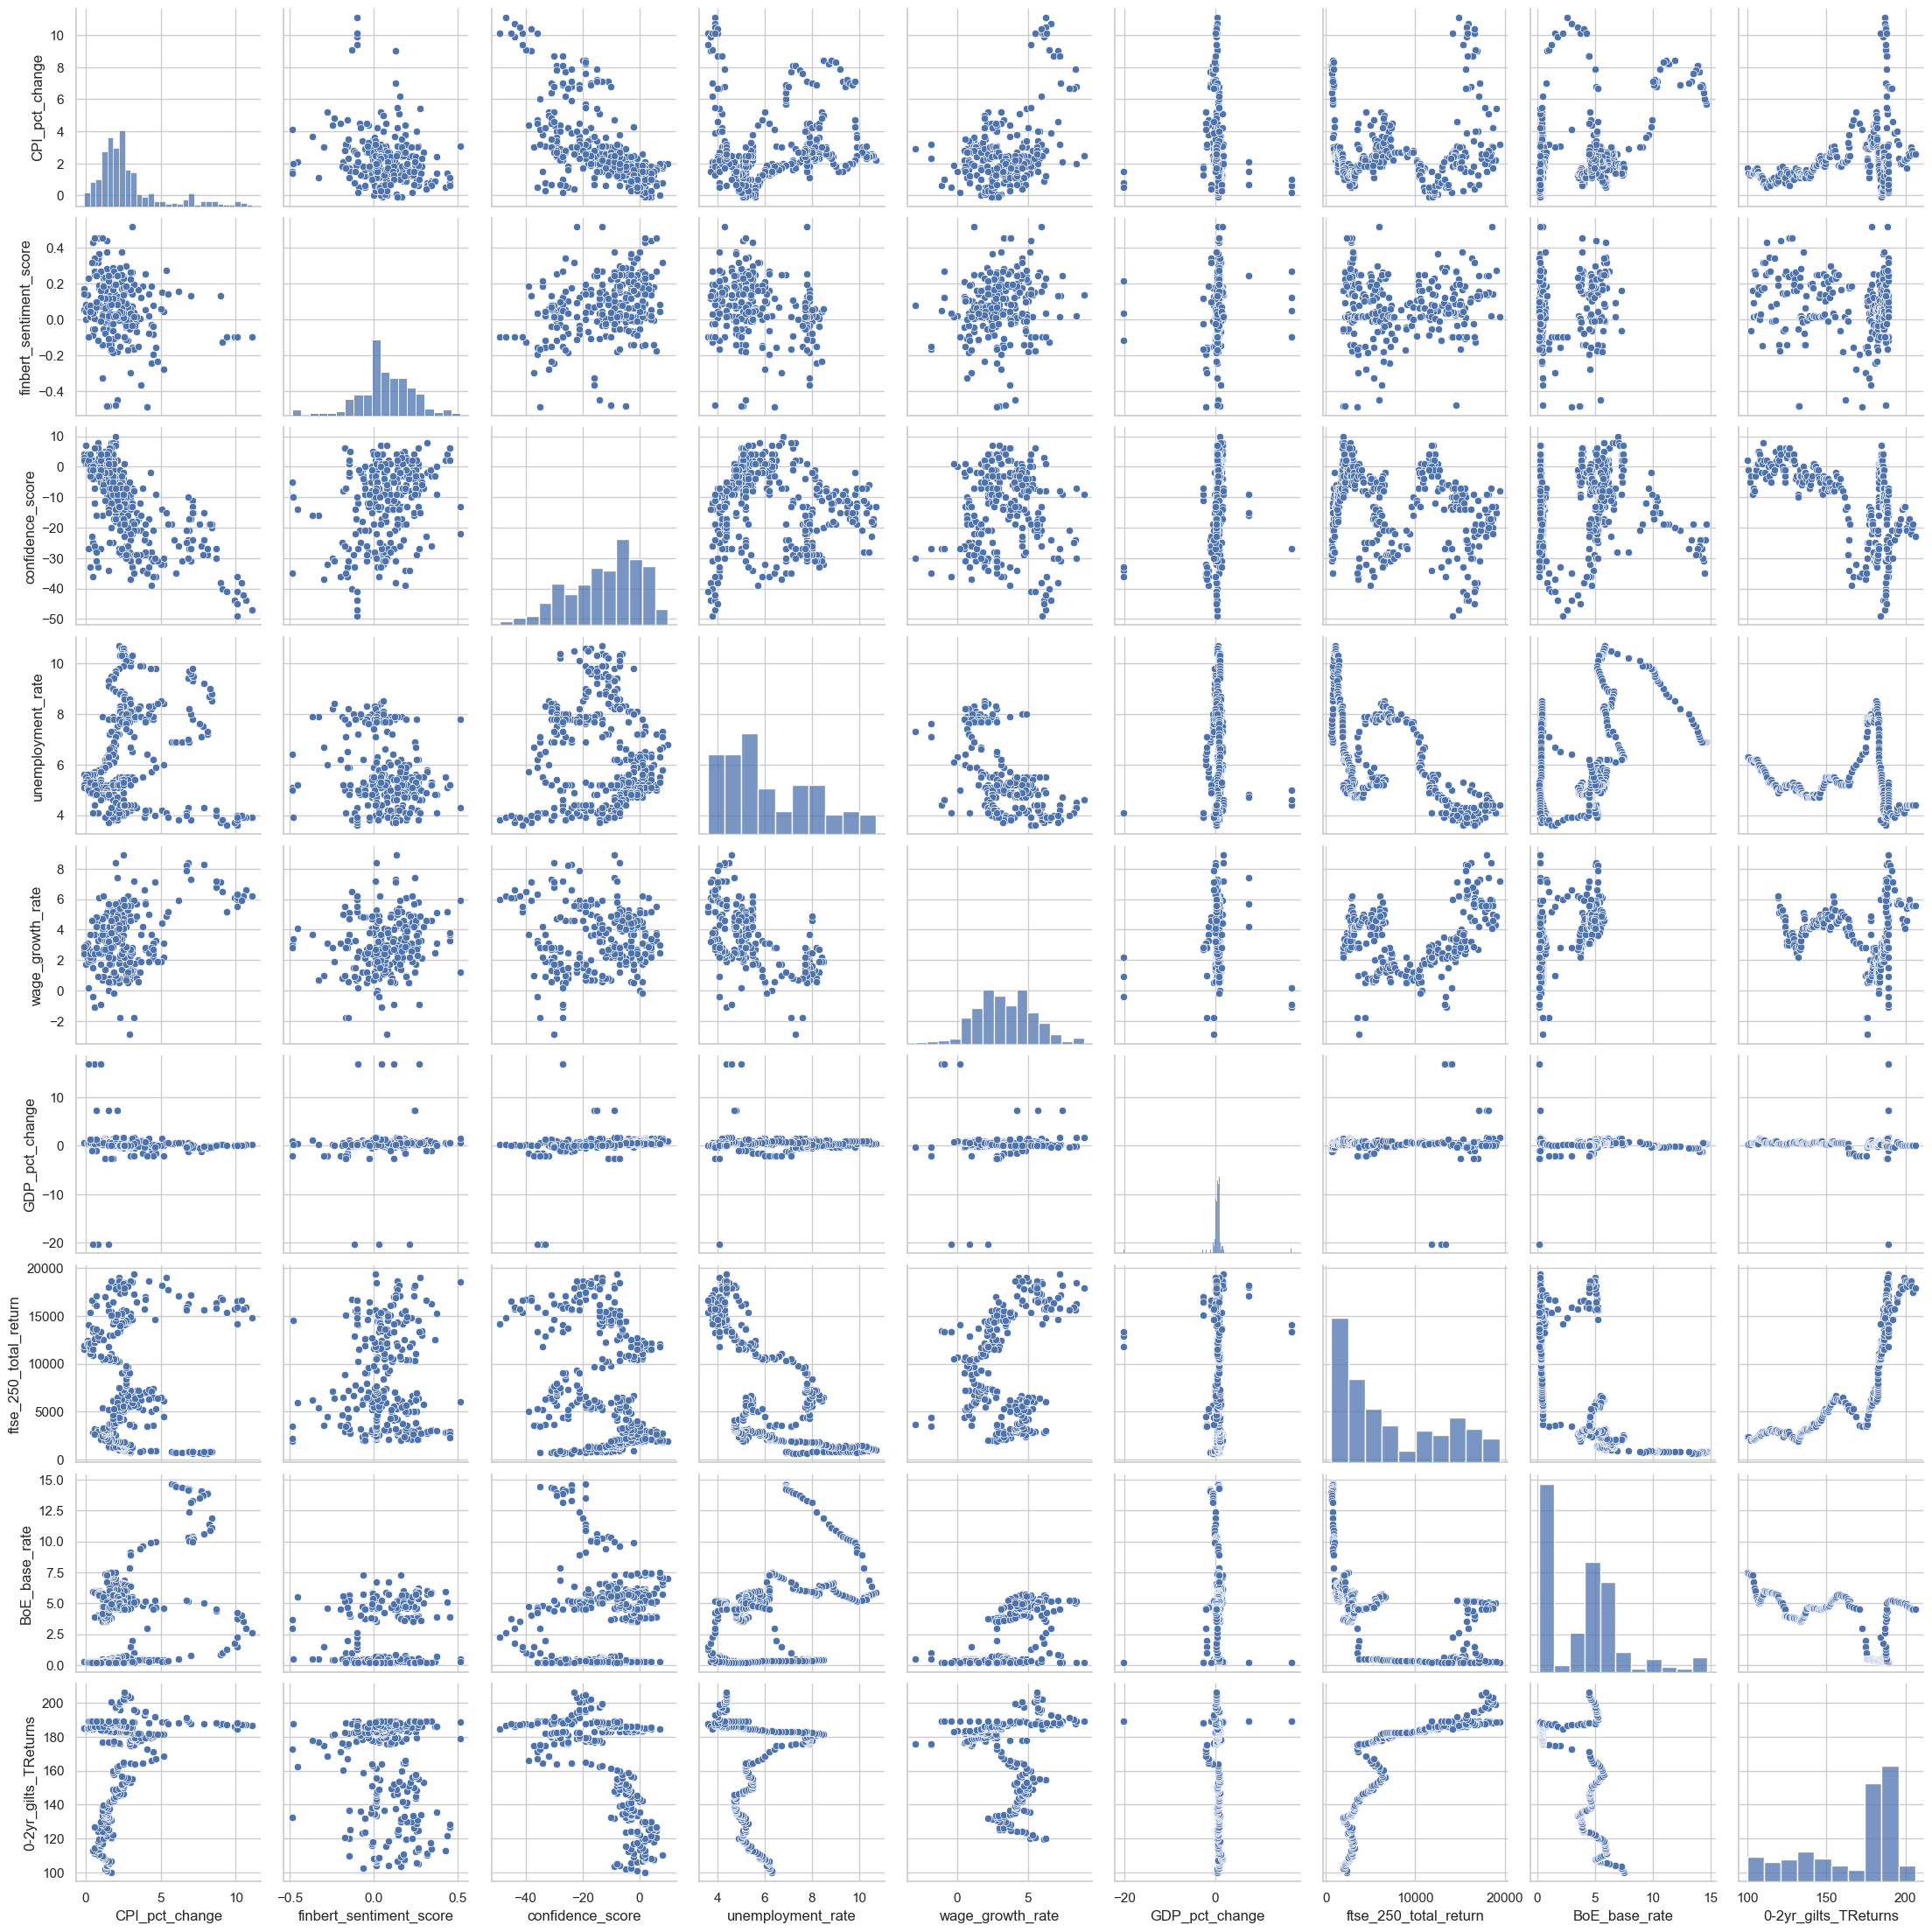

In [184]:
# Visualise the dataframe to pick out any direct relationships or specific distribution characteristics
sns.pairplot(df_uk_focused)

#### Create correlation matrices

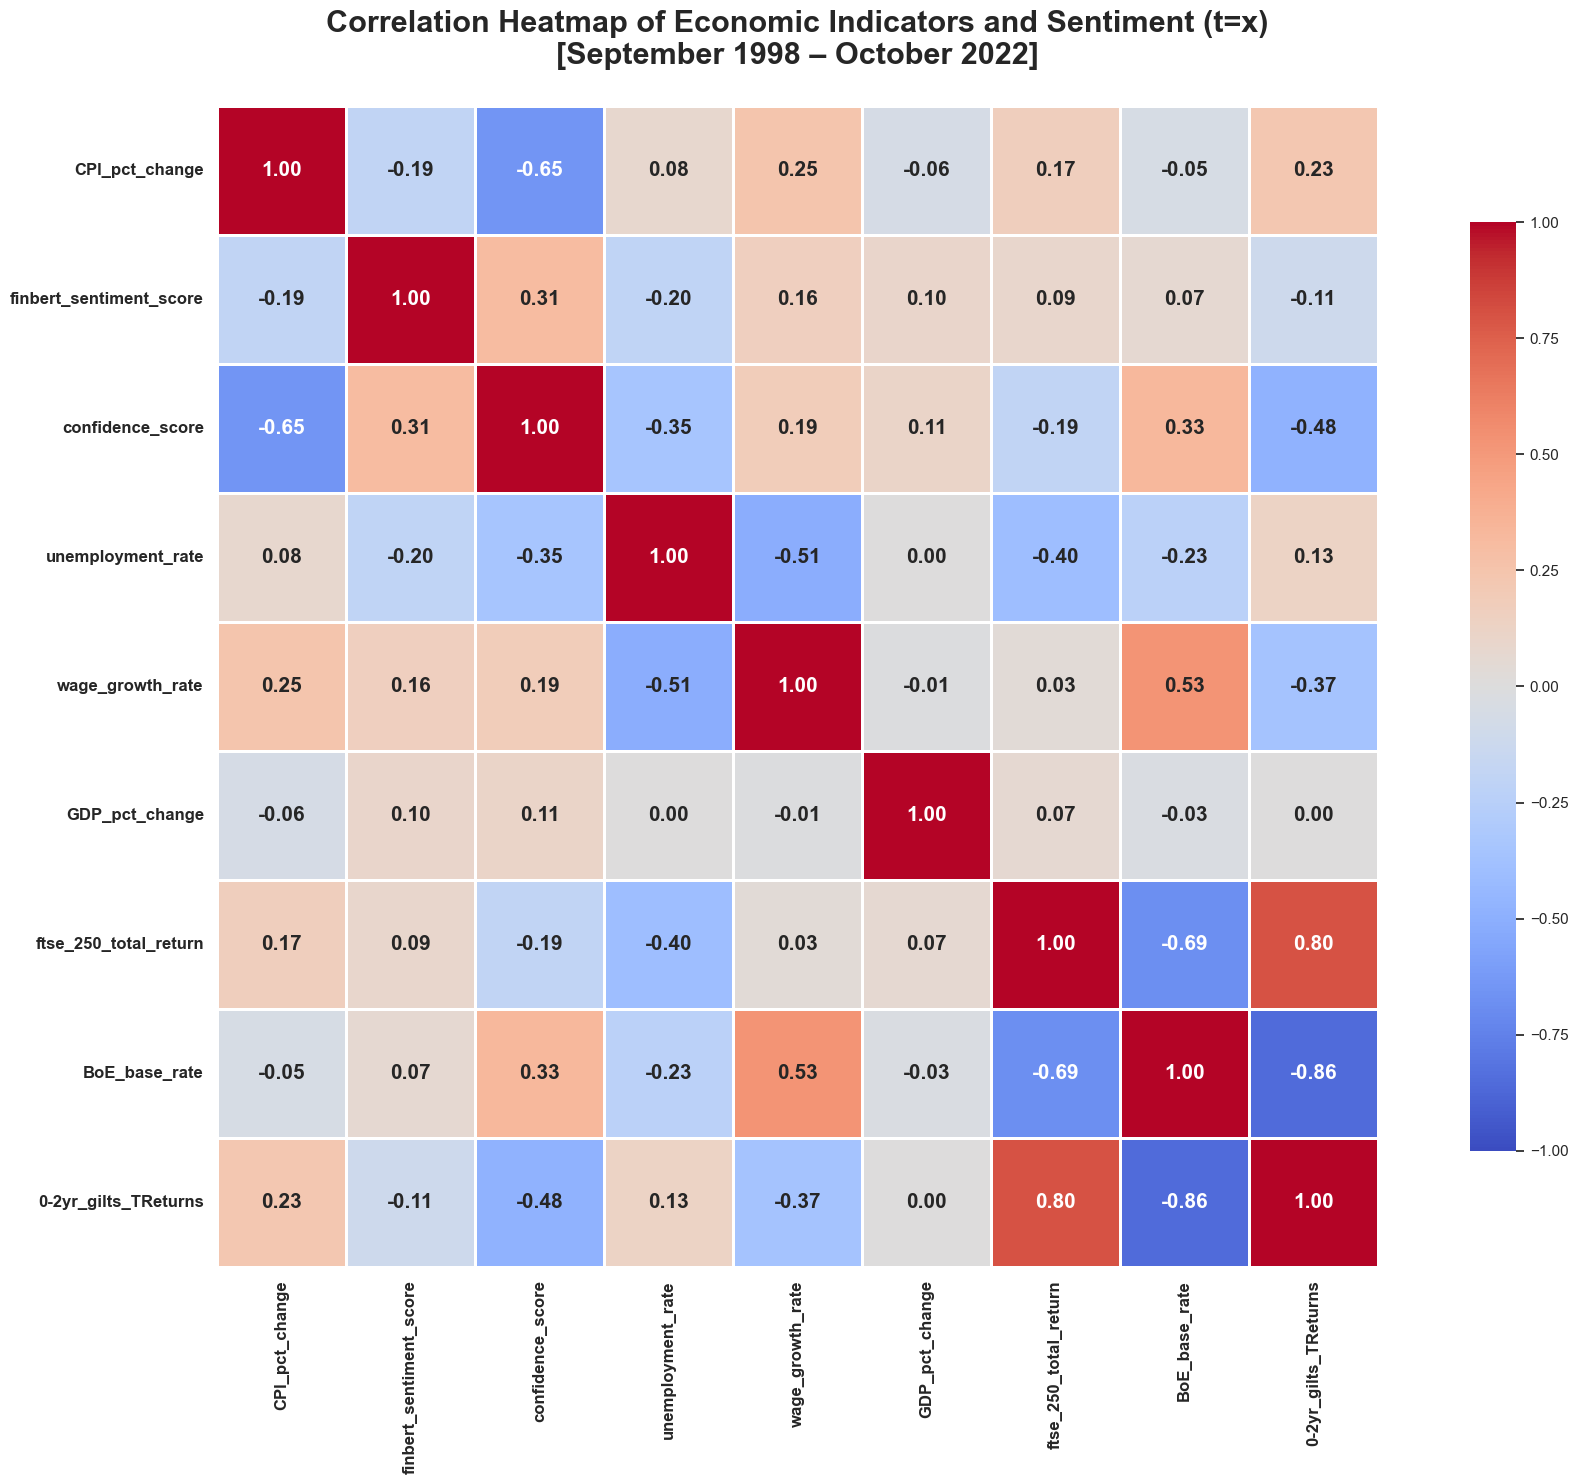

In [195]:
# --- Ensure date formatting ---
df_uk_focused['Date'] = pd.to_datetime(df_uk_focused['Date'], errors='coerce')

# --- Filter timeframe ---
start_date = "1998-09-01"
end_date = "2022-10-31"
filtered_df = df_uk_focused[
    (df_uk_focused['Date'] >= start_date) & 
    (df_uk_focused['Date'] <= end_date)
].copy()

# --- Correlation on numeric columns only ---
numeric_data = filtered_df.select_dtypes(include='number').dropna()
correlation_matrix = numeric_data.corr()

# Plot heatmap
plt.figure(figsize=(20, 15))
heatmap = sns.heatmap(
    correlation_matrix, 
    annot=True, 
    fmt=".2f", 
    cmap='coolwarm', 
    linewidths=1, 
    linecolor='white', 
    annot_kws={"size": 15, "weight": "bold"},
    cbar_kws={"shrink": 0.8},
    vmin=-1, 
    vmax=1,
    square=True
)

plt.title('Correlation Heatmap of Economic Indicators and Sentiment (t=x)\n[September 1998 – October 2022]', 
          fontsize=22, fontweight='bold', pad=30)
plt.xticks(fontsize=12, weight='bold')
plt.yticks(rotation=0, fontsize=12, weight='bold')
plt.tight_layout()

plt.show()

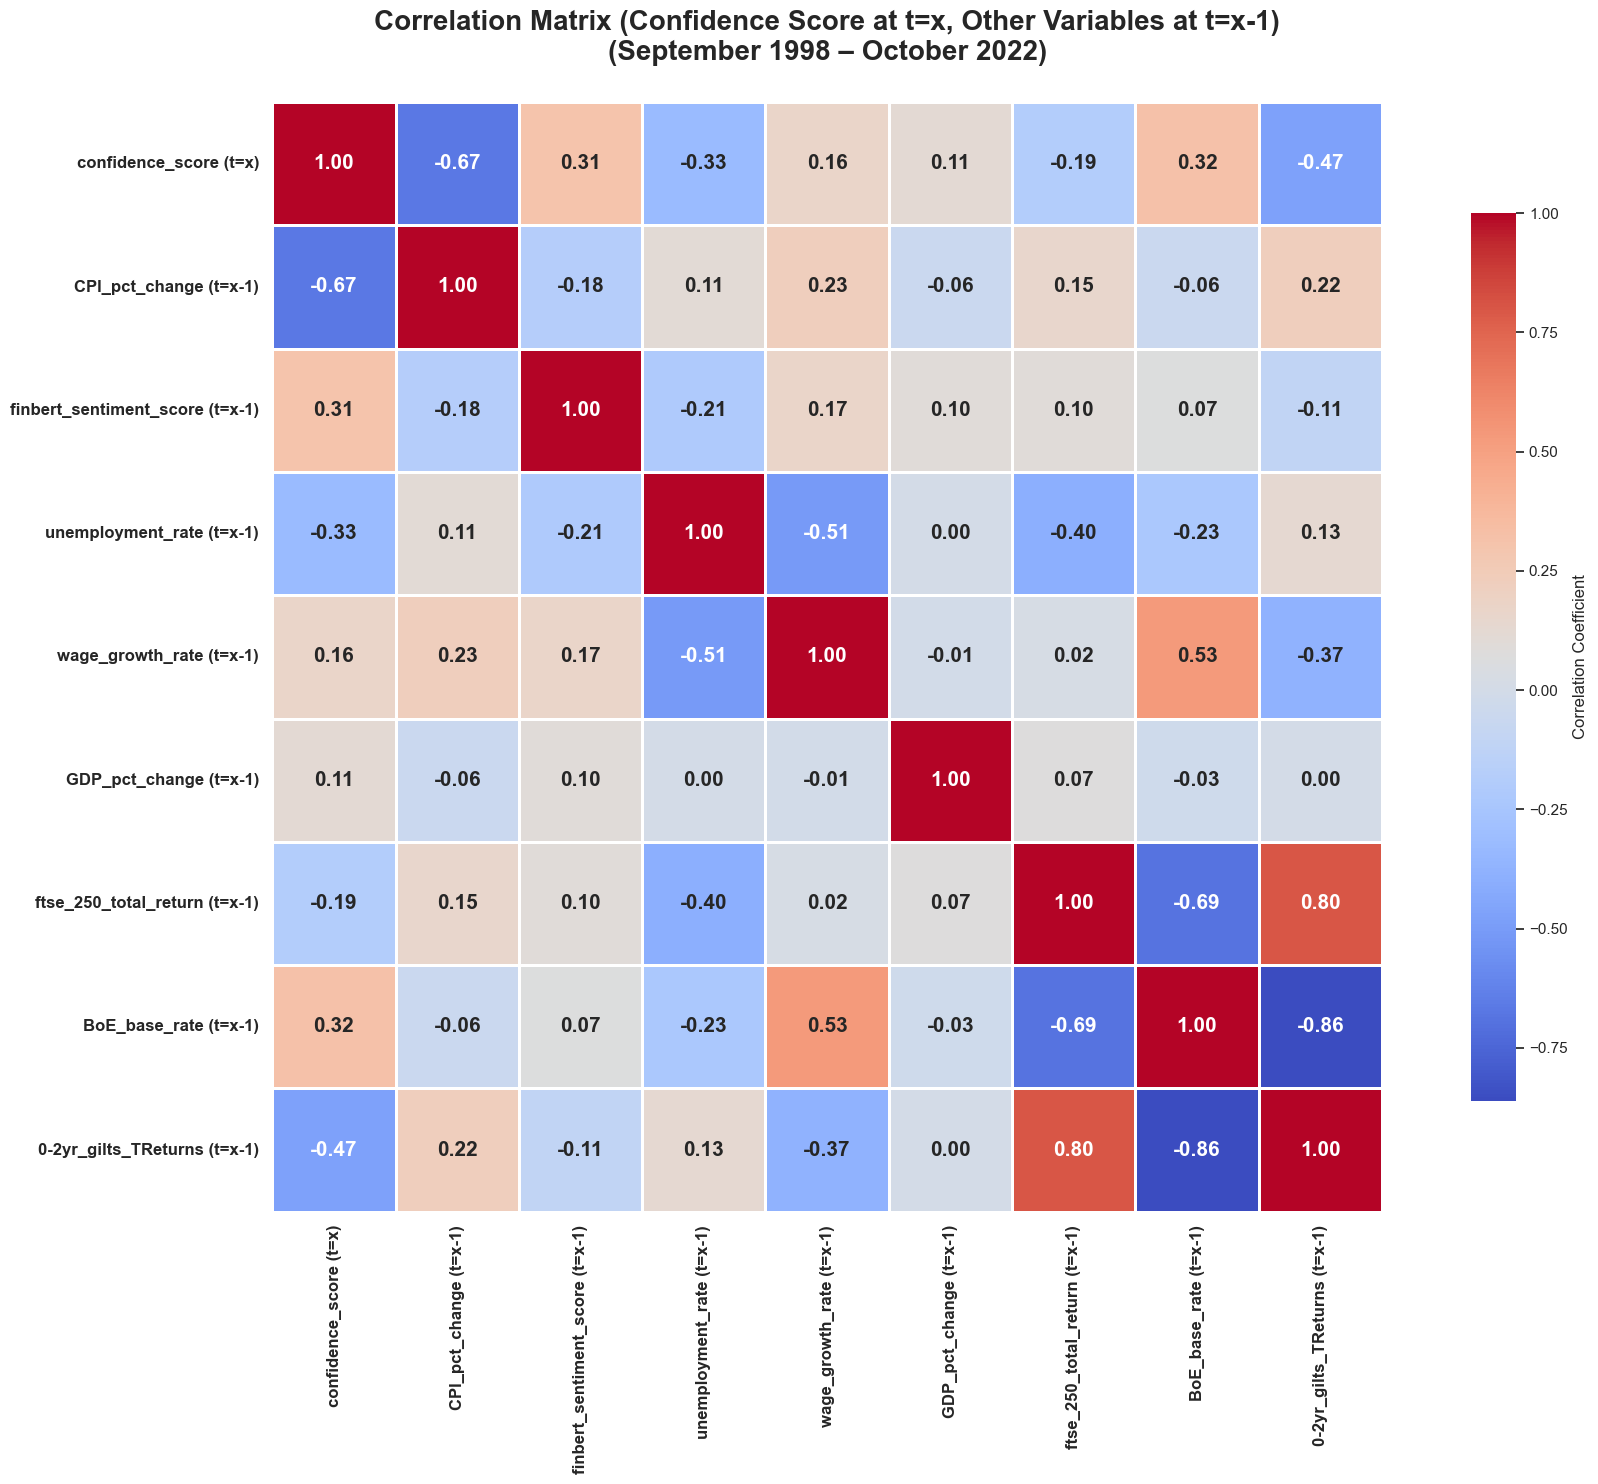

In [201]:
# Parse date and filter timeframe
df_uk_focused['Date'] = pd.to_datetime(df_uk_focused['Date'], dayfirst=True, errors='coerce')
df_uk_focused = df_uk_focused.dropna(subset=['Date'])

# Define date range
start_date = "1998-09-01"
end_date = "2022-10-31"
filtered_df = df_uk_focused[(df_uk_focused['Date'] >= start_date) & (df_uk_focused['Date'] <= end_date)].copy()

# Define columns of interest
columns_of_interest = [
    'CPI_pct_change', 'finbert_sentiment_score',
    'unemployment_rate', 'wage_growth_rate', 'GDP_pct_change',
    'ftse_250_total_return', 'BoE_base_rate', '0-2yr_gilts_TReturns'
]

# Start with confidence_score at t=0
correlation_df = filtered_df[['confidence_score']].copy()
correlation_df.rename(columns={'confidence_score': 'confidence_score (t=x)'}, inplace=True)

# Add all other variables with a 1-month lag
for col in columns_of_interest:
    if col in filtered_df.columns:
        correlation_df[f"{col} (t=x-1)"] = filtered_df[col].shift(1)

# Drop missing rows due to lag
correlation_df.dropna(inplace=True)

# Compute correlation matrix
correlation_matrix = correlation_df.corr()

#Plot
plt.figure(figsize=(20, 15))
sns.set(style="white")

heatmap = sns.heatmap(
    correlation_matrix,
    cmap="coolwarm",
    annot=True,
    fmt=".2f",
    annot_kws={"size": 15, "weight": "bold"},
    linewidths=1,
    linecolor='white',
    square=True,
    cbar_kws={'shrink': 0.8, 'label': 'Correlation Coefficient'},
)

plt.title(
    "Correlation Matrix (Confidence Score at t=x, Other Variables at t=x-1)\n(September 1998 – October 2022)",
    fontsize=20,
    fontweight='bold',
    pad=30
)
plt.xticks(fontsize=12, weight='bold')
plt.yticks(rotation=0, fontsize=12, weight='bold')
plt.tight_layout()
plt.show()


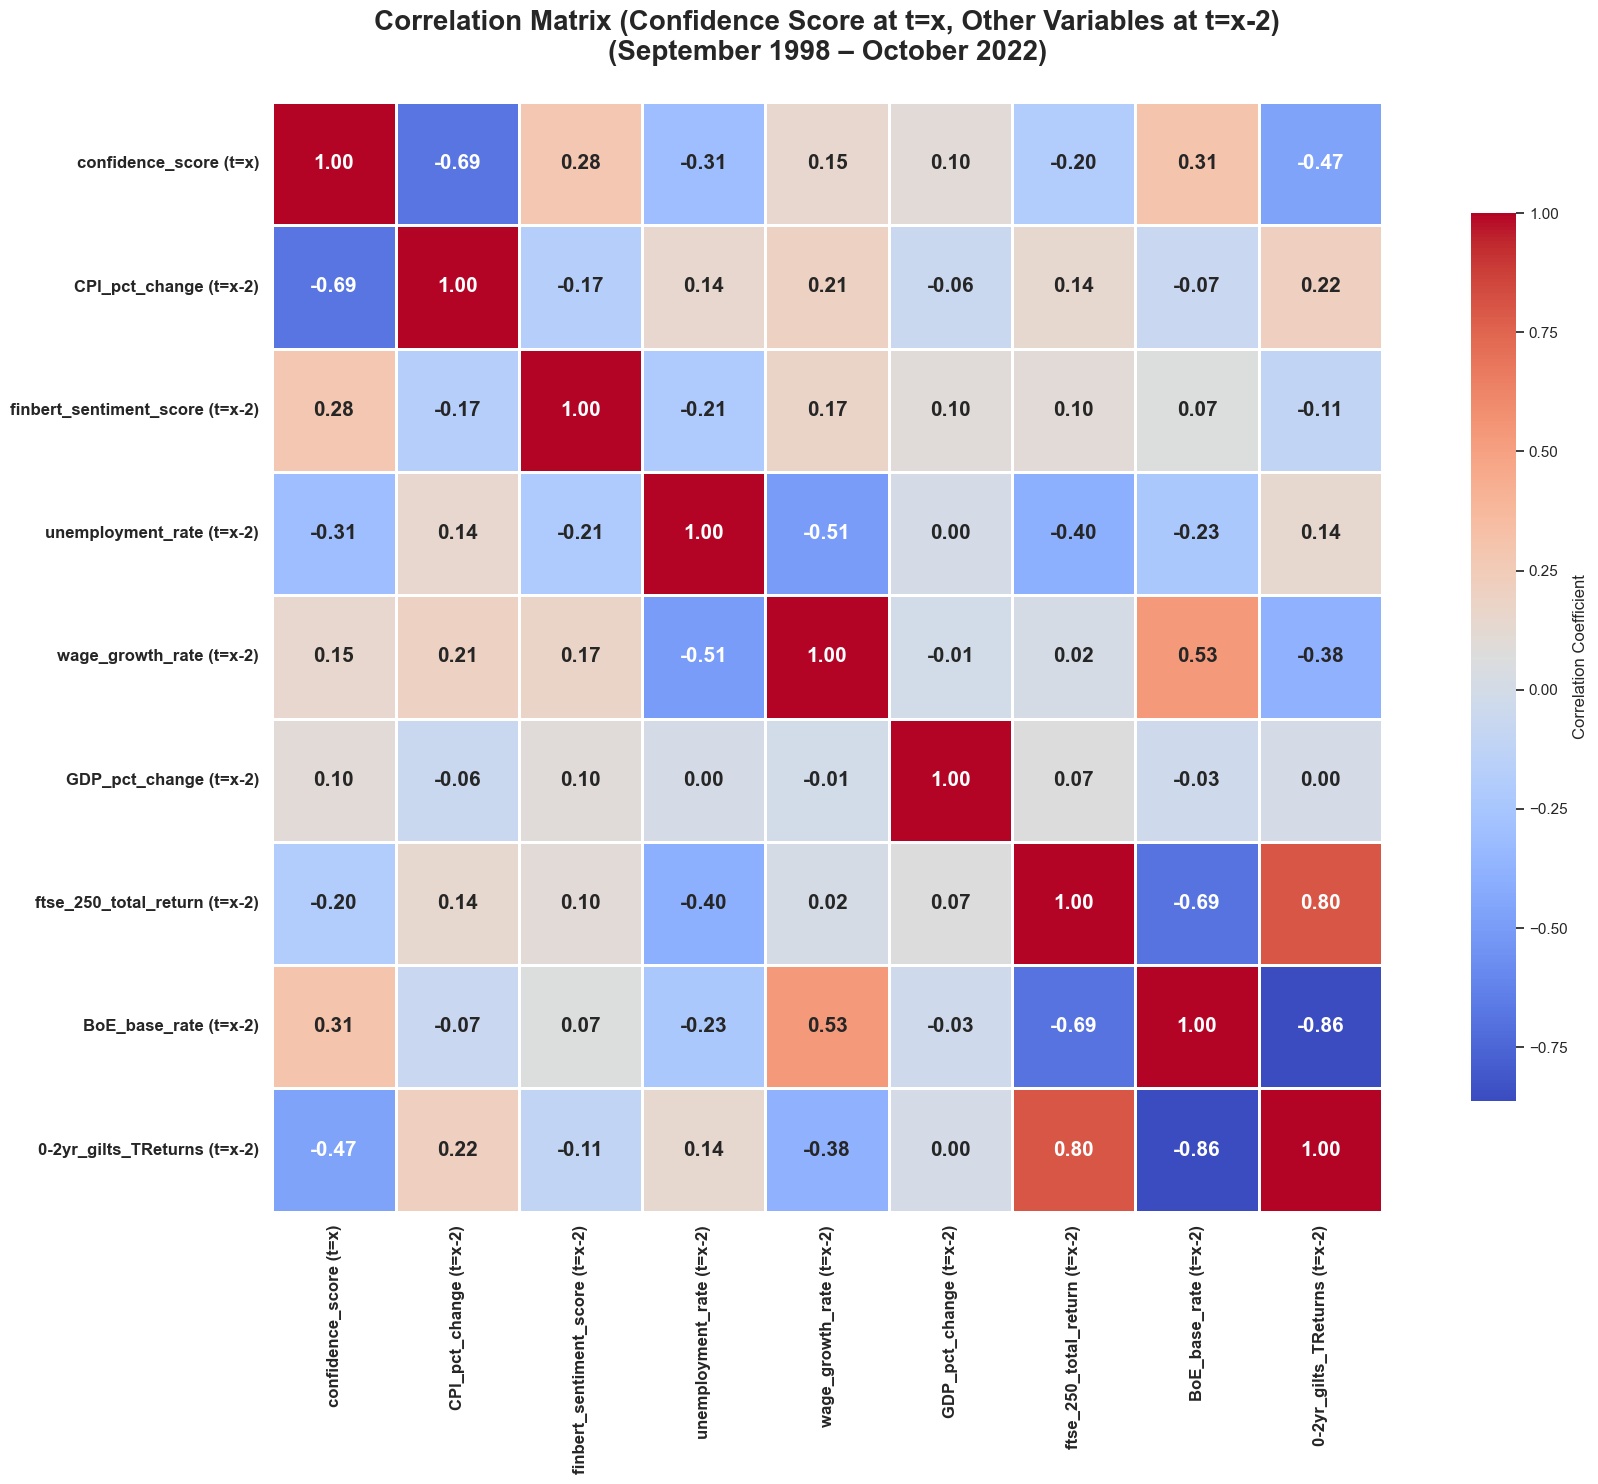

In [205]:
# Parse date and filter timeframe
df_uk_focused['Date'] = pd.to_datetime(df_uk_focused['Date'], dayfirst=True, errors='coerce')
df_uk_focused = df_uk_focused.dropna(subset=['Date'])

# Define date range
start_date = "1998-09-01"
end_date = "2022-10-31"
filtered_df = df_uk_focused[
    (df_uk_focused['Date'] >= start_date) &
    (df_uk_focused['Date'] <= end_date)
].copy()

# Define columns of interest (excluding confidence_score)
columns_of_interest = [
    'CPI_pct_change', 'finbert_sentiment_score',
    'unemployment_rate', 'wage_growth_rate', 'GDP_pct_change',
    'ftse_250_total_return', 'BoE_base_rate', '0-2yr_gilts_TReturns'
]

# Start with confidence_score at t=0
correlation_df = filtered_df[['confidence_score']].copy()
correlation_df.rename(columns={'confidence_score': 'confidence_score (t=x)'}, inplace=True)

# Add all other variables with a 2-month lag
for col in columns_of_interest:
    if col in filtered_df.columns:
        correlation_df[f"{col} (t=x-2)"] = filtered_df[col].shift(2)

# Drop missing rows due to lag
correlation_df.dropna(inplace=True)

# Compute correlation matrix
correlation_matrix = correlation_df.corr()

# Plot the heatmap
plt.figure(figsize=(20, 15))
sns.set(style="white")

heatmap = sns.heatmap(
    correlation_matrix,
    cmap="coolwarm",
    annot=True,
    fmt=".2f",
    annot_kws={"size": 15, "weight": "bold"},
    linewidths=1,
    linecolor='white',
    square=True,
    cbar_kws={'shrink': 0.8, 'label': 'Correlation Coefficient'},
)

plt.title(
    "Correlation Matrix (Confidence Score at t=x, Other Variables at t=x-2)\n(September 1998 – October 2022)",
    fontsize=20,
    fontweight='bold',
    pad=30
)
plt.xticks(fontsize=12, weight='bold')
plt.yticks(rotation=0, fontsize=12, weight='bold')
plt.tight_layout()
plt.show()

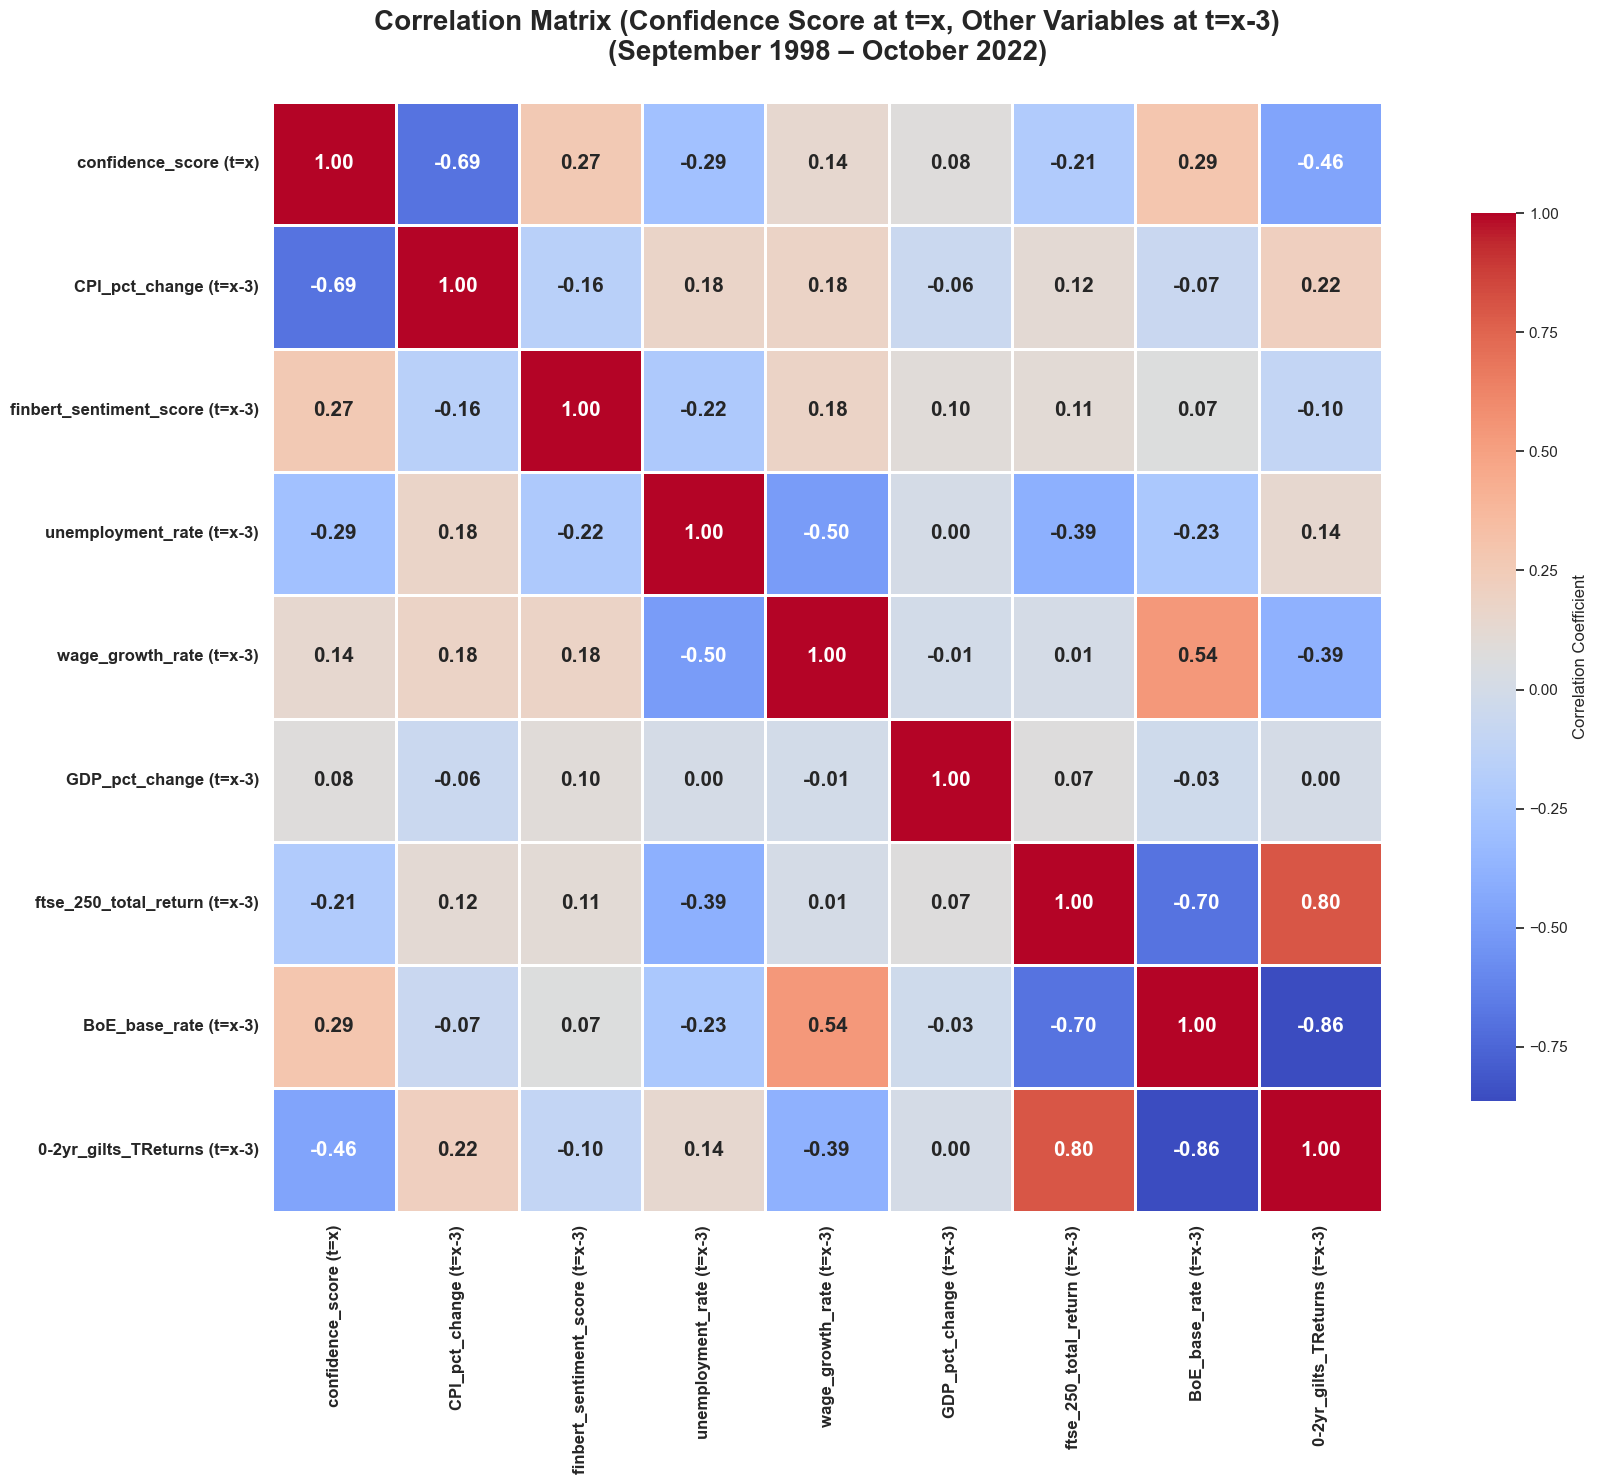

In [207]:
# Parse date and filter timeframe
df_uk_focused['Date'] = pd.to_datetime(df_uk_focused['Date'], dayfirst=True, errors='coerce')
df_uk_focused = df_uk_focused.dropna(subset=['Date'])

# Define date range
start_date = "1998-09-01"
end_date = "2022-10-31"
filtered_df = df_uk_focused[
    (df_uk_focused['Date'] >= start_date) &
    (df_uk_focused['Date'] <= end_date)
].copy()

# Define columns of interest (excluding confidence_score)
columns_of_interest = [
    'CPI_pct_change', 'finbert_sentiment_score',
    'unemployment_rate', 'wage_growth_rate', 'GDP_pct_change',
    'ftse_250_total_return', 'BoE_base_rate', '0-2yr_gilts_TReturns'
]

# Start with confidence_score at t=0
correlation_df = filtered_df[['confidence_score']].copy()
correlation_df.rename(columns={'confidence_score': 'confidence_score (t=x)'}, inplace=True)

# Add all other variables with a 3-month lag
for col in columns_of_interest:
    if col in filtered_df.columns:
        correlation_df[f"{col} (t=x-3)"] = filtered_df[col].shift(3)

# Drop missing rows due to lag
correlation_df.dropna(inplace=True)

# Compute correlation matrix
correlation_matrix = correlation_df.corr()

# Plot the heatmap
plt.figure(figsize=(20, 15))
sns.set(style="white")

heatmap = sns.heatmap(
    correlation_matrix,
    cmap="coolwarm",
    annot=True,
    fmt=".2f",
    annot_kws={"size": 15, "weight": "bold"},
    linewidths=1,
    linecolor='white',
    square=True,
    cbar_kws={'shrink': 0.8, 'label': 'Correlation Coefficient'},
)

plt.title(
    "Correlation Matrix (Confidence Score at t=x, Other Variables at t=x-3)\n(September 1998 – October 2022)",
    fontsize=20,
    fontweight='bold',
    pad=30
)
plt.xticks(fontsize=12, weight='bold')
plt.yticks(rotation=0, fontsize=12, weight='bold')
plt.tight_layout()
plt.show()


#### The analysis of the correlation heatmaps reveals that the confidence score (t=0) demonstrates the strongest positive correlation with the BoE base rate at time t (0.33), indicating a contemporaneous relationship between monetary policy and public sentiment. Conversely, the CPI percentage change shows the highest negative correlation at t-2 and t-3 (-0.69), suggesting that inflation changes may have a delayed inverse impact on confidence. FinBERT sentiment, GDP percentage change, and wage growth rate exhibit their strongest—though moderate—correlations at t or t-1, implying more immediate effects. The unemployment rate correlates most strongly at t (-0.35), while the FTSE 250 total return aligns best at t-3 (-0.21), hinting at a lagged effect from market performance. Lastly, the 0–2 year gilt total returns maintain a consistently moderate negative correlation, peaking at t (-0.48). These findings highlight varied lag structures across indicators and can guide variable selection for further modeling.

In [219]:
# Step 1: Parse date and filter timeframe
df_uk_focused['Date'] = pd.to_datetime(df_uk_focused['Date'], dayfirst=True, errors='coerce')
df_uk_focused = df_uk_focused.dropna(subset=['Date'])

start_date = "1998-09-01"
end_date = "2022-10-31"
filtered_df = df_uk_focused[
    (df_uk_focused['Date'] >= start_date) &
    (df_uk_focused['Date'] <= end_date)
].copy()

# Step 2: Create new DataFrame for regression
regression_df = pd.DataFrame()
regression_df['Date'] = filtered_df['Date']

# Add required variables with specific time lags
regression_df['confidence_score (t=x)'] = filtered_df['confidence_score']
regression_df['confidence_score (t=x-1)'] = filtered_df['confidence_score'].shift(1)
regression_df['BoE_base_rate (t=x)'] = filtered_df['BoE_base_rate']
regression_df['unemployment_rate (t=x)'] = filtered_df['unemployment_rate']
regression_df['0-2yr_gilts_TReturns (t=x)'] = filtered_df['0-2yr_gilts_TReturns']
regression_df['CPI_pct_change (t=x-2)'] = filtered_df['CPI_pct_change'].shift(2)
# Step 3: Drop rows with missing values due to shifting
regression_df.dropna(inplace=True)

# Step 4: View correlation matrix
correlation_matrix = regression_df.drop(columns='Date').corr()
display(correlation_matrix)


,confidence_score (t=x),confidence_score (t=x-1),BoE_base_rate (t=x),unemployment_rate (t=x),0-2yr_gilts_TReturns (t=x),CPI_pct_change (t=x-2)
confidence_score (t=x),1.000000,0.959595,0.418901,-0.319145,-0.541978,-0.701726
confidence_score (t=x-1),0.959595,1.000000,0.432275,-0.358781,-0.540423,-0.677462
BoE_base_rate (t=x),0.418901,0.432275,1.000000,-0.182785,-0.890999,-0.165766
unemployment_rate (t=x),-0.319145,-0.358781,-0.182785,1.000000,0.069900,0.153641
0-2yr_gilts_TReturns (t=x),-0.541978,-0.540423,-0.890999,0.069900,1.000000,0.311076
CPI_pct_change (t=x-2),-0.701726,-0.677462,-0.165766,0.153641,0.311076,1.000000


In [287]:
# Define dependent variable
y = regression_df['confidence_score (t=x)']

# Define independent variables
X = regression_df[
    ['confidence_score (t=x-1)','BoE_base_rate (t=x)', 'unemployment_rate (t=x)',
     '0-2yr_gilts_TReturns (t=x)','CPI_pct_change (t=x-2)']
]

# Initialize and fit the model
mlr = LinearRegression()
mlr.fit(X, y)

# Print coefficients
coefficients = pd.Series(mlr.coef_, index=X.columns)
intercept = mlr.intercept_

print("Intercept:", intercept)
print("Coefficients:")
print(coefficients)

Intercept: 6.779134746469639
Coefficients:
confidence_score (t=x-1)      0.887629
BoE_base_rate (t=x)          -0.270179
unemployment_rate (t=x)       0.056314
0-2yr_gilts_TReturns (t=x)   -0.038445
CPI_pct_change (t=x-2)       -0.740750
dtype: float64


In [289]:
LinearRegression()

LinearRegression()

In [291]:
# Call the predictions for X (array).
mlr.predict(X)

array([-7.72528188e+00, -5.95002295e+00, -5.84444106e+00, -6.68605515e+00,
       -2.27396277e+00, -4.93342556e-01,  1.45482414e+00,  1.24440090e+00,
        4.95654198e+00,  5.07289332e+00,  2.36680639e+00,  4.11115094e+00,
        2.35893264e+00,  2.30920544e+00, -1.20864208e+00,  1.32173711e+00,
        7.51687636e+00,  2.38940882e+00, -1.26340559e+00, -2.83935568e+00,
        2.45418288e+00,  7.36752254e-01, -2.16445399e+00,  1.29376145e+00,
       -3.83551302e+00,  2.74652758e-01, -1.52358079e+00, -7.30694187e-01,
        4.79719799e+00,  2.06246342e+00,  3.03327841e+00,  1.24055071e+00,
        1.92008907e+00,  5.09266263e+00,  3.31050792e+00,  1.91572628e-02,
       -1.12798365e+00, -4.17874705e+00, -2.32690930e+00, -2.78623373e-01,
        5.70366190e+00,  4.44908403e+00,  2.72045498e+00,  3.59843954e+00,
        5.43220798e+00,  5.83229682e+00,  2.41926436e+00,  2.01412136e+00,
        3.85973096e+00,  1.19725195e+00,  1.75227558e+00, -3.65831766e+00,
       -2.93872958e+00, -

In [293]:
# Checking the value of R-squared, intercept and coefficients.
# For linear regression models in scikit-learn, the score() method returns the R-squared (coefficient of determination) value.

print("R-squared: ", mlr.score(X, y))
print("Intercept: ", mlr.intercept_)
print("Coefficients:")

list(zip(X, mlr.coef_))

# The zip() function in the list(zip(X, multi.coef_)) line is used to pair corresponding elements from two iterable objects (in this case, X and multi.coef_).

R-squared:  0.9274733877894255
Intercept:  6.779134746469639
Coefficients:


[('confidence_score (t=x-1)', 0.8876294688661314),
 ('BoE_base_rate (t=x)', -0.27017907082837594),
 ('unemployment_rate (t=x)', 0.05631400203746673),
 ('0-2yr_gilts_TReturns (t=x)', -0.038445347248165666),
 ('CPI_pct_change (t=x-2)', -0.740749824380786)]

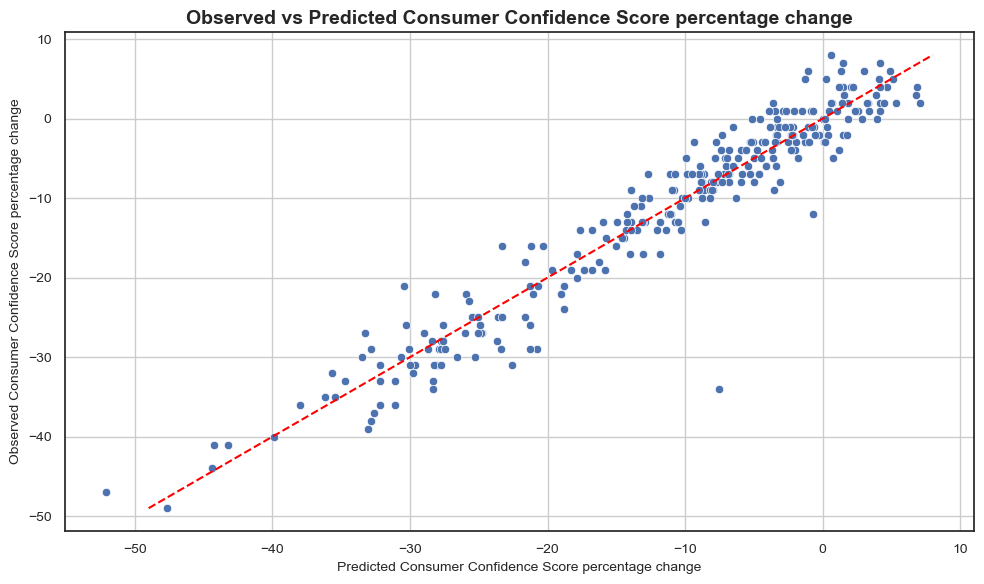

In [390]:
# Plot observed vs predicted values
plt.figure(figsize=(10, 6))
sns.scatterplot(x=mlr.predict(X), y=regression_df['confidence_score (t=x)'])

# Add Line of best fit (y = x)
plt.plot([y.min(), y.max()], [y.min(), y.max()], color='red', linestyle='--')

# Axis labels
plt.xlabel('Predicted Consumer Confidence Score percentage change', fontsize=10)
plt.ylabel('Observed Consumer Confidence Score percentage change', fontsize=10)

# Title
plt.title('Observed vs Predicted Consumer Confidence Score percentage change', fontsize=14, fontweight='bold')

# Tick label size
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)

# Final layout
plt.grid(True)
plt.tight_layout()
plt.show()

#### The scatter plot shows a strong alignment between predicted and actual values of the Consumer Confidence Score percentage change. Most data points cluster closely around the red dashed line, which represents perfect prediction. This suggests that the regression model performs well, with high predictive accuracy and minimal error across the dataset. The visual pattern supports the high R² value reported in the regression summary.

### Training and testing subsets with MLR

In [336]:
# Create train and test data sets.
# Split the data in 'train' (80%) and 'test' (20%) sets, which is the recommended ratio to prevent overfitting
x_train, x_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.2,
                                                    random_state=42)

In [338]:
# Training the model using the 'statsmodel' OLS library.
# Fit the model with the added constant.
model1 = sm.OLS(y_train, sm.add_constant(x_train)).fit()

# Set the predicted response vector i.e. calculate and store the model's predictions for the target variable (y) based on the test data.
Y_pred = model1.predict(sm.add_constant(x_test)) 
# sm.add_constant(x_test): This adds a constant term (intercept) to the x_test data. This is important because the model was trained with a constant, so it expects input data to also have a constant term for predictions.

# Call a summary of the model.
print_model = model1.summary()

# Print the summary.
print(print_model)  

                              OLS Regression Results                              
Dep. Variable:     confidence_score (t=x)   R-squared:                       0.921
Model:                                OLS   Adj. R-squared:                  0.920
Method:                     Least Squares   F-statistic:                     531.4
Date:                    Sat, 17 May 2025   Prob (F-statistic):          4.08e-123
Time:                            13:38:59   Log-Likelihood:                -620.27
No. Observations:                     233   AIC:                             1253.
Df Residuals:                         227   BIC:                             1273.
Df Model:                               5                                         
Covariance Type:                nonrobust                                         
                                 coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------

#### The regression results show a strong model fit, with an R-squared of 0.921, meaning about 92% of the variation in the current Consumer Confidence Score is explained by the predictors. The lagged confidence score (t=x-1) is highly significant (p < 0.001) and is the most influential factor. CPI percentage change (t=x-2) is also statistically significant (p = 0.008), while other variables like BoE base rate, unemployment rate, and 0–2 year gilts are not significant. The Durbin-Watson value (~1.93) indicates no major autocorrelation. However, the Jarque-Bera and Omnibus tests suggest the residuals are not normally distributed, and the high condition number implies potential multicollinearity that may require further inspection.

In [341]:
# Run regression on the training subset
# Specify the model
mlr = LinearRegression()  

# Fit the model.
mlr.fit(x_train, y_train)

LinearRegression()

In [343]:
LinearRegression()

LinearRegression()

In [345]:
# Call the predictions for X in the train set.
y_pred_train = mlr.predict(x_train)  

# Print the predictions.
print("Prediction for test set: {}".format(y_pred_train)) 

Prediction for test set: [ 3.12313545e+00 -1.11928002e+01 -6.67007475e+00 -6.07508521e+00
  1.62369263e-01 -1.40116365e+01 -2.81245827e+01 -7.07264468e+00
 -3.06898621e+00 -1.96423705e+01 -5.13325870e+00  1.36776838e+00
  2.49028281e+00 -2.17798597e+00 -2.23281706e+00  1.36199532e+00
 -4.30147224e+00  7.69115579e+00 -4.36759245e+01 -1.80932914e+01
 -2.55258401e+01 -2.12624090e+00 -1.51728675e+00 -2.86709689e+01
 -1.42700980e+01 -1.49236776e+01  5.81331152e-01 -2.12965425e+01
 -1.37849984e+00 -8.08052220e+00 -8.74163934e+00 -1.04371029e+01
 -5.89945171e+00 -6.31931407e+00 -8.34240564e+00 -1.30097138e+01
 -4.71636635e+00 -7.48902421e+00 -2.19056233e+01 -2.42303070e+00
 -1.59931179e+01 -2.12972985e+01 -1.82480635e+00 -2.89099093e+01
 -2.92784420e+01 -3.16480619e+01 -2.78191574e+00  2.35363725e+00
  1.11579126e+00 -4.68644790e+01 -8.65159344e-02 -5.87465440e-01
 -2.04161583e+01 -1.32420595e+01 -2.56720601e+01 -8.16406962e+00
 -2.49484779e+01 -1.50373158e+01 -2.81021826e+00 -2.76172407e+01


In [347]:
# Call the predictions for x in the test set.
y_pred_train = mlr.predict(x_test)  

# Print the predictions.
print("Prediction for test set: {}".format(y_pred_train))  

Prediction for test set: [ -6.00526684 -32.59869642   5.85913867 -21.1519186  -17.75835809
 -33.1556223  -11.34213868 -38.4247837    5.26708391  -7.68775783
 -20.62154685  -9.65427266   5.24459761 -17.89269208  -7.58344069
  -0.93653673   2.33346255  -0.34294053 -11.38661695 -13.95788721
 -35.20394376  -8.47666338  -9.07265474  -9.41602593  -3.57139948
 -26.3762784  -14.64682719  -9.28275163  -2.90832324   0.67528393
   2.81214562  -2.80030251 -27.60131117 -33.61791882  -2.81491126
 -27.71891102 -15.786885   -17.68721806 -32.36292688  -4.81275598
 -20.54849776  -3.11792887 -30.9344604  -30.65408778 -10.50646032
   2.91321532  -2.36432972  -4.11832967 -10.00827453 -36.06087293
 -14.70783503  -1.14037004   2.3598489  -24.94622214  -3.44981491
 -21.31872036 -12.06420547 -26.64761603   1.60281991]


In [349]:
# Print the R-squared value.
print(mlr.score(x_test, y_test)*100) 

94.77176668731755


#### An R-squared value of 94.77% indicates that the regression model explains nearly 95% of the variance in the Consumer Confidence Score on the test data. This suggests a very strong fit and high predictive power.

### Check for multicollinearity

In [353]:
# Check multicollinearity.
# Why need to keep adding constant? Because we're using the Statsmodel library, which requires us to do so, 
# whereas the Scikit-learn already assumes that the regression has a constant by default
x_temp = sm.add_constant(x_train)

# Create an empty DataFrame. 
vif = pd.DataFrame()

# Calculate the VIF for each value.
vif['VIF Factor'] = [variance_inflation_factor(x_temp.values,
                                               i) for i in range(x_temp.values.shape[1])]

# Create the feature columns.
vif['features'] = x_temp.columns

# Print the values to one decimal points.
print(vif.round(1))

   VIF Factor                    features
0       378.3                       const
1         2.9    confidence_score (t=x-1)
2         6.0         BoE_base_rate (t=x)
3         1.3     unemployment_rate (t=x)
4         6.6  0-2yr_gilts_TReturns (t=x)
5         2.1      CPI_pct_change (t=x-2)


#### The Variance Inflation Factor (VIF) results show that BoE_base_rate (6.0) and 0-2yr_gilts_TReturns (6.6) exceed the commonly used multicollinearity threshold of 5, indicating moderate multicollinearity. While not extreme, it suggests these predictors may be linearly related to other variables in the model, potentially distorting coefficient estimates. The const term also shows a very high VIF (378.3), which is expected due to its static nature. Other variables like confidence_score (t=x-1), unemployment_rate (t=x), and CPI_pct_change (t=x-2) remain within acceptable limits, suggesting they can be retained without concern. If multicollinearity is affecting model interpretability, consider removing or combining highly collinear features.

### Check for heteroscedasticity

In [357]:
# Determine heteroscedasticity.
model2 = sms.het_breuschpagan(model1.resid, model1.model.exog) 

In [359]:
terms = ['LM stat', 'LM Test p-value', 'F-stat', 'F-test p-value']
print(dict(zip(terms, model2)))

{'LM stat': 2.803299017773049, 'LM Test p-value': 0.7302795849759051, 'F-stat': 0.5528740197572262, 'F-test p-value': 0.7360430140866099}


#### The Breusch-Pagan test results indicate that there is no significant evidence of heteroskedasticity in the model. Both the LM statistic (2.80) and F-statistic (0.55) are relatively low, and their associated p-values (0.73 and 0.74 respectively) are well above the 0.05 threshold. This means we fail to reject the null hypothesis of homoskedasticity, suggesting that the variance of the residuals is constant across observations. This supports the reliability of the model’s standard errors and validates one of the key assumptions of ordinary least squares regression.

### Check normality of regression residuals - assumption of MLR

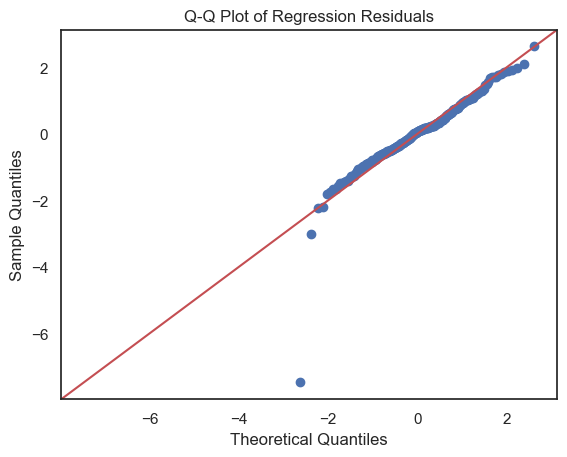

In [367]:
# Q-Q plot of residuals
sm.qqplot(model1.resid, line='45', fit=True)
plt.title("Q-Q Plot of Regression Residuals")
plt.show()

#### The Q-Q plot shows that most of the residuals lie along the 45-degree reference line, suggesting that the residuals are approximately normally distributed. A few points deviate in the tails, indicating minor departures from normality, but overall the assumption of normality appears to be reasonably met.

### Evaluate the model

In [371]:
# Call the metrics.mean_absolute_error function.  
print('Mean Absolute Error (Final):', metrics.mean_absolute_error(y_test, Y_pred))  

# Call the metrics.mean_squared_error function.
print('Mean Square Error (Final):', metrics.mean_squared_error(y_test, Y_pred))  

Mean Absolute Error (Final): 2.264387847266565
Mean Square Error (Final): 8.466854252681705


#### The final model shows a Mean Absolute Error (MAE) of approximately 2.26, meaning that on average, the predicted consumer confidence scores deviate from the actual values by just over 2 percentage points. The Mean Squared Error (MSE) is 8.47, reflecting a low overall variance in the prediction errors. These results indicate a strong model performance with relatively accurate predictions.

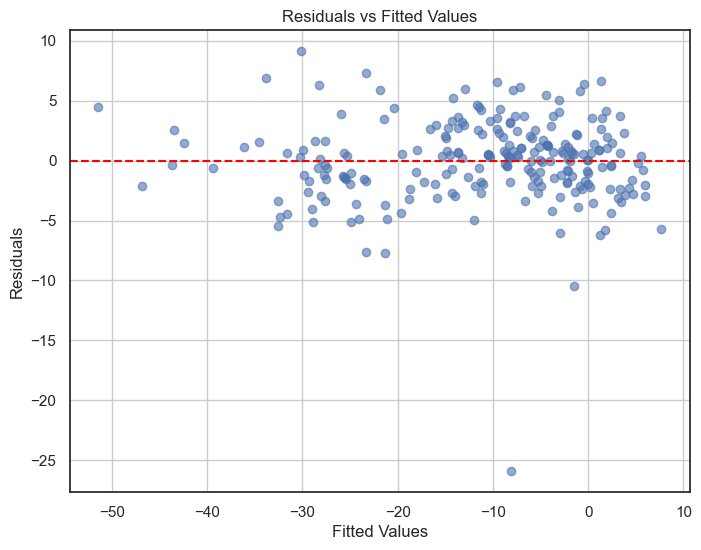

In [373]:
# Fitted values from statsmodels
fitted_vals = model1.fittedvalues
residuals = model1.resid

# Plot
plt.figure(figsize=(8, 6))
plt.scatter(fitted_vals, residuals, alpha=0.6)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel("Fitted Values")
plt.ylabel("Residuals")
plt.title("Residuals vs Fitted Values")
plt.grid(True)
plt.show()

#### The residuals vs. fitted values plot shows that the residuals are generally centered around zero, which is a good sign. However, there is some visible funnel-shaped spread and mild curvature, especially for lower fitted values (left side), indicating slight heteroskedasticity or non-linearity. While the pattern is not extreme, it suggests that the variance of residuals may not be entirely constant across all levels of predicted values. 

### Multiple linear regression: Drop 0-2yr_gilts_TReturns (t=x), and  BoE_base_rate (t=x) as variables and explore transformation of dependent variable (if possible)

### Re-perform MLR 

In [380]:
# Define dependent variable
y = regression_df['confidence_score (t=x)']

# Define independent variables
X = regression_df[
    ['confidence_score (t=x-1)','unemployment_rate (t=x)',
    'CPI_pct_change (t=x-2)']
]

# Specify the model
mlr = LinearRegression()

# Fit the model
mlr.fit(X, y)

LinearRegression()

In [382]:
LinearRegression()

LinearRegression()

In [384]:
# Call the predictions for X (array).
mlr.predict(X)

array([-8.67477064e+00, -6.84082201e+00, -6.82244190e+00, -7.73941621e+00,
       -3.30366351e+00, -1.46971489e+00,  4.94972488e-01,  2.52914078e-01,
        4.06993019e+00,  4.20066894e+00,  1.44974601e+00,  3.26531452e+00,
        1.50592533e+00,  1.50592533e+00, -2.06903238e+00,  5.88951014e-01,
        7.08233063e+00,  1.78578294e+00, -1.97505385e+00, -3.60370429e+00,
        1.86138136e+00,  1.01992163e-01, -2.87260907e+00,  7.39108858e-01,
       -4.55743883e+00, -2.89185113e-01, -2.12313374e+00, -1.28071886e+00,
        4.42642520e+00,  1.58256272e+00,  2.55571635e+00,  6.65588405e-01,
        1.35888442e+00,  4.67236462e+00,  2.83841600e+00, -6.05802957e-01,
       -1.82101500e+00, -5.09773497e+00, -3.18922692e+00, -1.07542067e+00,
        5.13810133e+00,  3.84832985e+00,  2.08894066e+00,  3.00591497e+00,
        4.91442303e+00,  5.36177963e+00,  1.86138136e+00,  1.47020408e+00,
        3.37871214e+00,  6.09409086e-01,  1.20976556e+00, -4.34825964e+00,
       -3.56202408e+00, -

In [386]:
# Checking the value of R-squared, intercept and coefficients.
# For linear regression models in scikit-learn, the score() method returns the R-squared (coefficient of determination) value.

print("R-squared: ", mlr.score(X, y))
print("Intercept: ", mlr.intercept_)
print("Coefficients:")

list(zip(X, mlr.coef_))

# The zip() function in the list(zip(X, multi.coef_)) line is used to pair corresponding elements from two iterable objects (in this case, X and multi.coef_).

R-squared:  0.9260732931078485
Intercept:  -0.49935667592382593
Coefficients:


[('confidence_score (t=x-1)', 0.9169743126138755),
 ('unemployment_rate (t=x)', 0.18380113229164705),
 ('CPI_pct_change (t=x-2)', -0.7455943252381498)]

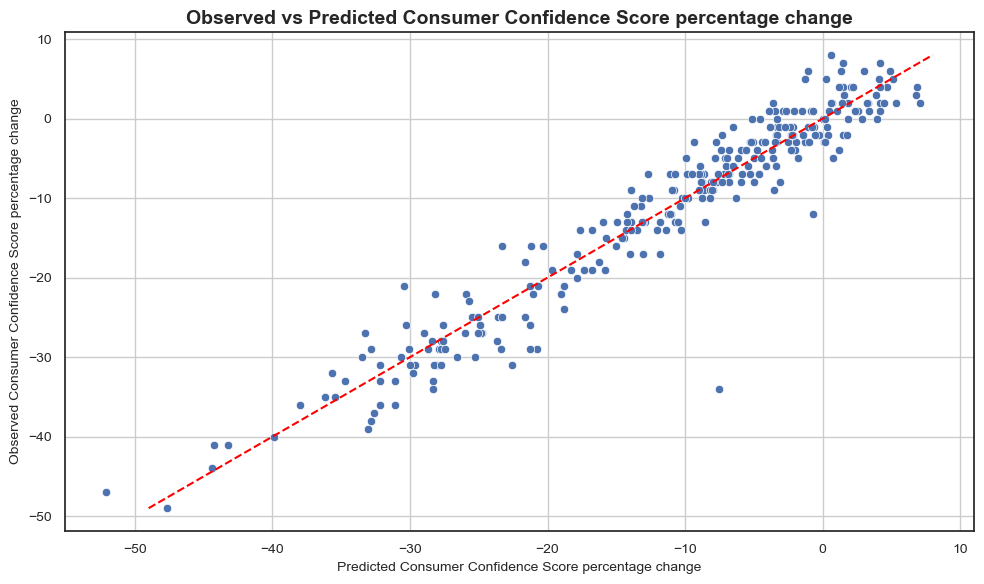

In [392]:
# Plot observed vs predicted values
plt.figure(figsize=(10, 6))
sns.scatterplot(x=mlr.predict(X), y=regression_df['confidence_score (t=x)'])

# Add Line of best fit (y = x)
plt.plot([y.min(), y.max()], [y.min(), y.max()], color='red', linestyle='--')

# Axis labels
plt.xlabel('Predicted Consumer Confidence Score percentage change', fontsize=10)
plt.ylabel('Observed Consumer Confidence Score percentage change', fontsize=10)

# Title
plt.title('Observed vs Predicted Consumer Confidence Score percentage change', fontsize=14, fontweight='bold')

# Tick label size
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)

# Final layout
plt.grid(True)
plt.tight_layout()
plt.show()

### Training and testing subsets with MLR

In [394]:
# Create train and test data sets.
# Split the data in 'train' (80%) and 'test' (20%) sets, which is the recommended ratio to prevent overfitting
x_train, x_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.2,
                                                    random_state=42)

In [396]:
# Training the model using the 'statsmodel' OLS library.
# Fit the model with the added constant.
model3 = sm.OLS(y_train, sm.add_constant(x_train)).fit()

# Set the predicted response vector i.e. calculate and store the model's predictions for the target variable (y) based on the test data.
Y_pred = model3.predict(sm.add_constant(x_test)) 
# sm.add_constant(x_test): This adds a constant term (intercept) to the x_test data. This is important because the model was trained with a constant, so it expects input data to also have a constant term for predictions.

# Call a summary of the model.
print_model = model3.summary()

# Print the summary.
print(print_model)  

                              OLS Regression Results                              
Dep. Variable:     confidence_score (t=x)   R-squared:                       0.920
Model:                                OLS   Adj. R-squared:                  0.919
Method:                     Least Squares   F-statistic:                     875.5
Date:                    Sat, 17 May 2025   Prob (F-statistic):          3.90e-125
Time:                            14:00:43   Log-Likelihood:                -622.45
No. Observations:                     233   AIC:                             1253.
Df Residuals:                         229   BIC:                             1267.
Df Model:                               3                                         
Covariance Type:                nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------

In [398]:
# Check multicollinearity.
# Why need to keep adding constant? Because we're using the Statsmodel library, which requires us to do so, 
# whereas the Scikit-learn already assumes that the regression has a constant by default
x_temp = sm.add_constant(x_train)

# Create an empty DataFrame. 
vif = pd.DataFrame()

# Calculate the VIF for each value.
vif['VIF Factor'] = [variance_inflation_factor(x_temp.values,
                                               i) for i in range(x_temp.values.shape[1])]

# Create the feature columns.
vif['features'] = x_temp.columns

# Print the values to one decimal points.
print(vif.round(1))

   VIF Factor                  features
0        22.3                     const
1         2.2  confidence_score (t=x-1)
2         1.2   unemployment_rate (t=x)
3         2.0    CPI_pct_change (t=x-2)


In [400]:
# Determine heteroscedasticity.
model4 = sms.het_breuschpagan(model3.resid, model3.model.exog)

In [402]:
terms = ['LM stat', 'LM Test p-value', 'F-stat', 'F-test p-value']
print(dict(zip(terms, model2)))


{'LM stat': 2.803299017773049, 'LM Test p-value': 0.7302795849759051, 'F-stat': 0.5528740197572262, 'F-test p-value': 0.7360430140866099}


#### The updated regression model, which excludes high-VIF predictors like the BoE base rate and 0–2 year gilts returns, performs nearly identically to the previous full model in terms of explanatory power, with an R-squared of 0.920 compared to 0.921. By removing variables that contributed to multicollinearity, the updated model improves interpretability and robustness without sacrificing accuracy. Additionally, both models passed the Breusch-Pagan test, indicating no signs of heteroskedasticity, and residual plots showed broadly acceptable distribution. Overall, the updated model is more parsimonious and statistically reliable, making it a better choice for further analysis.

In [404]:
regression_df.describe()

,Date,confidence_score (t=x),confidence_score (t=x-1),BoE_base_rate (t=x),unemployment_rate (t=x),0-2yr_gilts_TReturns (t=x),CPI_pct_change (t=x-2)
count,292,292.000000,292.000000,292.000000,292.000000,292.000000,292.000000
mean,2010-10-21 15:32:03.287671296,-11.434932,-11.304795,2.278632,5.587671,163.676671,2.141096
min,1998-11-01 00:00:00,-49.000000,-49.000000,0.175000,3.600000,104.005000,-0.100000
25%,2004-10-24 06:00:00,-20.250000,-19.250000,0.355917,4.700000,140.413750,1.200000
50%,2010-11-16 00:00:00,-8.000000,-8.000000,0.561988,5.200000,179.571000,1.850000
75%,2016-10-08 18:00:00,-2.000000,-2.000000,4.625000,6.125000,185.829000,2.700000
max,2022-10-01 00:00:00,8.000000,8.000000,6.750000,8.500000,189.413000,10.100000
std,NaN,12.464625,12.289167,2.234709,1.314753,27.268144,1.541930


In [406]:
regression_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 292 entries, 107 to 398
Data columns (total 7 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   Date                        292 non-null    datetime64[ns]
 1   confidence_score (t=x)      292 non-null    float64       
 2   confidence_score (t=x-1)    292 non-null    float64       
 3   BoE_base_rate (t=x)         292 non-null    float64       
 4   unemployment_rate (t=x)     292 non-null    float64       
 5   0-2yr_gilts_TReturns (t=x)  292 non-null    float64       
 6   CPI_pct_change (t=x-2)      292 non-null    float64       
dtypes: datetime64[ns](1), float64(6)
memory usage: 18.2 KB


In [408]:
regression_df.head()

,Date,confidence_score (t=x),confidence_score (t=x-1),BoE_base_rate (t=x),unemployment_rate (t=x),0-2yr_gilts_TReturns (t=x),CPI_pct_change (t=x-2)
107,1998-11-01,-7.0,-9.0,6.75,6.1,104.005,1.4
108,1998-11-01,-7.0,-7.0,6.75,6.1,104.005,1.4
109,1998-12-01,-8.0,-7.0,6.25,6.2,104.919,1.4
110,1999-01-01,-3.0,-8.0,6.00,6.2,105.479,1.4
111,1999-02-01,-1.0,-3.0,5.50,6.2,105.817,1.6


Root Mean Squared Error: 3.0380
Mean Squared Error: 9.2294
Mean Absolute Error: 2.2560
R² Score: 0.9419


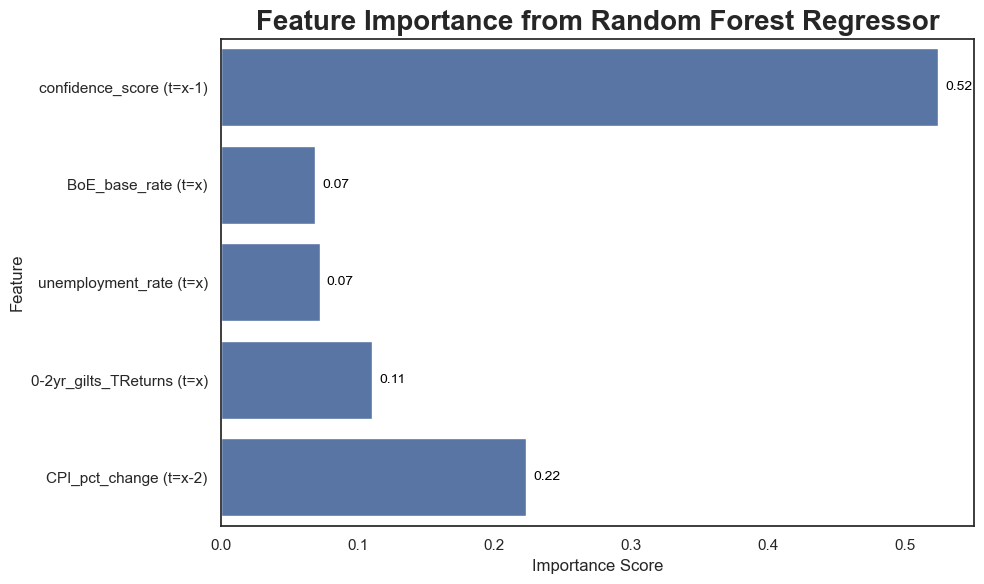

In [412]:
# 1. Prepare the data
# -------------------
regression_df = regression_df.dropna(
    subset=[
        'confidence_score (t=x)',
        'confidence_score (t=x-1)',
        'BoE_base_rate (t=x)',
        'unemployment_rate (t=x)',
        '0-2yr_gilts_TReturns (t=x)',
        'CPI_pct_change (t=x-2)',
    ]
)

# Define dependent variable
y = regression_df['confidence_score (t=x)']

# Define independent variables
X = regression_df[
    [
        'confidence_score (t=x-1)',
        'BoE_base_rate (t=x)',
        'unemployment_rate (t=x)',
        '0-2yr_gilts_TReturns (t=x)',
        'CPI_pct_change (t=x-2)'
    ]
]

# 2. Train-test split
# -------------------
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# 3. Build and train the Random Forest model
# ------------------------------------------
rf_model = RandomForestRegressor(
    n_estimators=200,
    min_samples_split=2,
    min_samples_leaf=2,
    max_features='sqrt',
    bootstrap=True,
    n_jobs=-1,
    random_state=42,
)

rf_model.fit(X_train, y_train)

# 4. Predictions and Evaluation
# -----------------------------
y_pred = rf_model.predict(X_test)

rmse = np.sqrt(mean_squared_error(y_test, y_pred))
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Root Mean Squared Error: {rmse:.4f}")
print(f"Mean Squared Error: {mse:.4f}")
print(f"Mean Absolute Error: {mae:.4f}")
print(f"R² Score: {r2:.4f}")

# 5. Feature Importance Plot
# --------------------------
feature_importances = pd.Series(rf_model.feature_importances_, index=X.columns)

plt.figure(figsize=(10, 6))
ax = sns.barplot(x=feature_importances, y=feature_importances.index)
plt.title("Feature Importance from Random Forest Regressor", fontsize=20, fontweight='bold')
plt.xlabel("Importance Score")
plt.ylabel("Feature")

for i, (value, name) in enumerate(zip(feature_importances, feature_importances.index)):
    ax.text(value + 0.005, i, f"{value:.2f}", color='black', va='center', fontsize=10)

plt.tight_layout()
plt.show()

Root Mean Squared Error: 3.2772
Mean Squared Error: 10.7401
Mean Absolute Error: 2.5369
R² Score: 0.9324


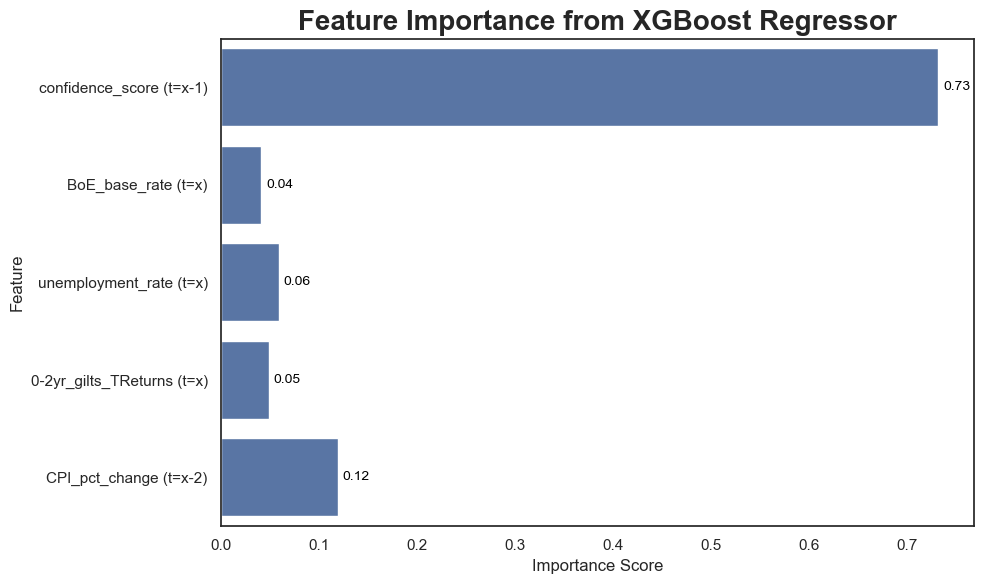

In [414]:
from xgboost import XGBRegressor

# 1. Prepare the data
# -------------------
# Drop missing values
regression_df = regression_df.dropna(subset=[
    'confidence_score (t=x)',
    'confidence_score (t=x-1)',
    'BoE_base_rate (t=x)',
    'unemployment_rate (t=x)',
    '0-2yr_gilts_TReturns (t=x)',
    'CPI_pct_change (t=x-2)'
])

# Define features and target
X = regression_df[
    [
        'confidence_score (t=x-1)',
        'BoE_base_rate (t=x)',
        'unemployment_rate (t=x)',
        '0-2yr_gilts_TReturns (t=x)',
        'CPI_pct_change (t=x-2)'
    ]
]
y = regression_df['confidence_score (t=x)']

# 2. Train-test split
# -------------------
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42
)

# 3. Initialize and train XGBoost model
# -------------------------------------
xgb_model = XGBRegressor(
    n_estimators=200,
    learning_rate=0.1,
    max_depth=3,
    subsample=0.8,
    colsample_bytree=0.8,
    objective='reg:squarederror',
    random_state=42
)

xgb_model.fit(X_train, y_train)

# 4. Predict and evaluate
# -----------------------
y_pred = xgb_model.predict(X_test)

rmse = np.sqrt(mean_squared_error(y_test, y_pred))
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Root Mean Squared Error: {rmse:.4f}")
print(f"Mean Squared Error: {mse:.4f}")
print(f"Mean Absolute Error: {mae:.4f}")
print(f"R² Score: {r2:.4f}")

# 5. Plot feature importance
# --------------------------
feature_importance = pd.Series(xgb_model.feature_importances_, index=X.columns)

plt.figure(figsize=(10, 6))
ax = sns.barplot(x=feature_importance, y=feature_importance.index)

plt.title("Feature Importance from XGBoost Regressor", fontsize=20, fontweight='bold')
plt.xlabel("Importance Score")
plt.ylabel("Feature")

# Add value labels
for i, (value, name) in enumerate(zip(feature_importance, feature_importance.index)):
    ax.text(value + 0.005, i, f"{value:.2f}", color='black', va='center', fontsize=10)

plt.tight_layout()
plt.show()

#### Both Random Forest and XGBoost models identified the previous month’s confidence score (t=x-1) as the most important predictor of the current confidence score (t=x), with 52% and 73% importance respectively. CPI percentage change at t=x-2 was the next most influential variable, though its impact was notably lower. Other economic indicators—BoE base rate, unemployment rate, and 0–2yr gilts returns—showed minimal influence in both models. While Random Forest had slightly better error performance, XGBoost emphasized feature importance more distinctly. Overall, the results highlight the strong persistence of sentiment and limited short-term influence of macroeconomic indicators.

### Random Forest vs. XGBoost Models

In [136]:
!pip install xgboost

   ---------------------------------------- 0.0/150.0 MB ? eta -:--:--
   ---------------------------------------- 0.4/150.0 MB 13.4 MB/s eta 0:00:12
   ---------------------------------------- 1.7/150.0 MB 21.3 MB/s eta 0:00:07
   - -------------------------------------- 4.0/150.0 MB 31.6 MB/s eta 0:00:05
   - -------------------------------------- 6.3/150.0 MB 36.3 MB/s eta 0:00:04
   -- ------------------------------------- 8.2/150.0 MB 37.4 MB/s eta 0:00:04
   -- ------------------------------------- 9.6/150.0 MB 36.2 MB/s eta 0:00:04
   --- ------------------------------------ 12.0/150.0 MB 46.7 MB/s eta 0:00:03
   --- ------------------------------------ 13.9/150.0 MB 43.5 MB/s eta 0:00:04
   ---- ----------------------------------- 16.0/150.0 MB 43.5 MB/s eta 0:00:04
   ---- ----------------------------------- 18.4/150.0 MB 43.7 MB/s eta 0:00:04
   ----- ---------------------------------- 20.0/150.0 MB 46.9 MB/s eta 0:00:03
   ----- ---------------------------------- 22.0/150.0 


--- Random Forest ---
R² Score: 0.9537
MAE: 2.1800
MSE: 7.4966

--- XGBoost ---
R² Score: 0.9442
MAE: 2.2837
MSE: 9.0380


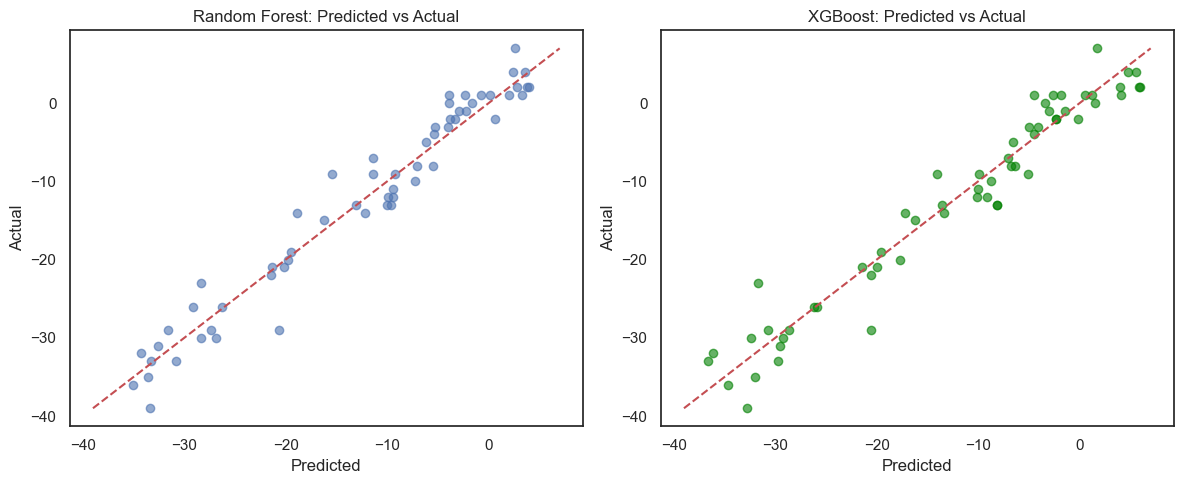

In [418]:
# 1. Prepare the data
# -------------------
regression_df = regression_df.dropna(subset=[
    'confidence_score (t=x)',
    'confidence_score (t=x-1)',
    'BoE_base_rate (t=x)',
    'unemployment_rate (t=x)',
    '0-2yr_gilts_TReturns (t=x)',
    'CPI_pct_change (t=x-2)'
])

# 2. Define features and target
# -----------------------------
X = regression_df[[
    'confidence_score (t=x-1)',
    'BoE_base_rate (t=x)',
    'unemployment_rate (t=x)',
    '0-2yr_gilts_TReturns (t=x)',
    'CPI_pct_change (t=x-2)'
]]
y = regression_df['confidence_score (t=x)']

# 3. Train-test split
# -------------------
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# 4. Train Random Forest model
# ----------------------------
rf_model = RandomForestRegressor(random_state=42)
rf_model.fit(X_train, y_train)
rf_preds = rf_model.predict(X_test)

# 5. Train XGBoost model
# ----------------------
xgb_model = XGBRegressor(random_state=42)
xgb_model.fit(X_train, y_train)
xgb_preds = xgb_model.predict(X_test)

# 6. Evaluation function
# ----------------------
def evaluate_model(name, y_true, y_pred):
    print(f"\n--- {name} ---")
    print(f"R² Score: {r2_score(y_true, y_pred):.4f}")
    print(f"MAE: {mean_absolute_error(y_true, y_pred):.4f}")
    print(f"MSE: {mean_squared_error(y_true, y_pred):.4f}")

# 7. Evaluate both models
# -----------------------
evaluate_model("Random Forest", y_test, rf_preds)
evaluate_model("XGBoost", y_test, xgb_preds)

# 8. Plot Predictions vs Actuals
# ------------------------------
plt.figure(figsize=(12, 5))

# Random Forest plot
plt.subplot(1, 2, 1)
plt.scatter(rf_preds, y_test, alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Random Forest: Predicted vs Actual")

# XGBoost plot
plt.subplot(1, 2, 2)
plt.scatter(xgb_preds, y_test, alpha=0.6, color='green')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("XGBoost: Predicted vs Actual")

plt.tight_layout()
plt.show()

#### The comparison of the two scatter plots—Random Forest (left) and XGBoost (right)—shows that both models perform well in predicting the Customer Confidence Score. The predicted values closely align with the actual values along the red dashed reference line in each plot. However, XGBoost demonstrates a slightly tighter clustering around the line with fewer outliers, especially in the lower score ranges, suggesting better overall accuracy and generalization.